- **Collect:** University of San Diego
- **Course:** Natural Language Processing and GenAI (AAI-520)
- **Final Project:** Financial Analysis Aystem Powered by Agentic AI
- **Professor:** Kahila Mokhtari Jadid
- **Team Members:** Pros Loung, Dennis Arpurayil, Divya Kamath 
- **GitHub Repository:** (https://github.com/ploung/AAI_520_NLP_Final_Project.git)



### 1. Financial Analysis Aystem Powered by Agentic AI

#### 1.1 Project Overview

This project builds a real-world financial analysis system powered by agentic AI that can reason, plan, and act autonomously. Unlike traditional scripted pipelines, our agentic system coordinates multiple specialized LLM agents to handle complex financial tasks end-to-end.



#### 1.2 System Architecture 

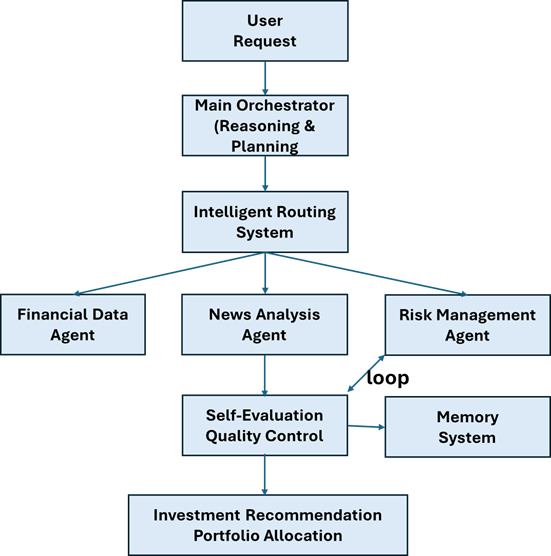



##### Agents Description:
1. **User Request**: User request for stock analysis
2. **Master Coordinator Agent**: Plans and orchestrates the entire analysis workflow
3. **Financial Data Retrieval Agent**: 
   **yfinance** Python library is used for retrieving financal data. The method returns the following finanical information for a particular stock including: company information, historical stock price, quarterly financial, news, mutual fund holers, and broker recommendation information. 
4. **News Analysis Agent**: Processes financial news and extracts key insights
5. **Sentiment Analysis Agent**: Analyzes market sentiment from news and social media
6. **Risk Assessment Agent**: Evaluates portfolio risks and suggests optimizations
7. **Report Generation Agent**: Creates comprehensive investment reports
8. **Self-Evaluation Agent**: Critiques outputs and triggers re-analysis when needed

##### Key Features:
- Multi-Agent Coordination: Specialized agents for data retrieval, news analysis, sentiment analysis, and risk assessment
- Intelligent Routing: Dynamic task routing based on content type and market conditions
- Self-Critique & Optimization: Agents evaluate and refine their own outputs iteratively
- Memory & Context: Persistent memory across analysis sessions for better decision making
- Real-time Processing: Integration with live market data and news feeds

##### Detailed Component Architecture:

**Master Coordinator Agent**
```python
class MasterCoordinatorAgent:
    - reason_and_plan()          # Analyzes requests and creates execution plans
    - coordinate_agents()        # Orchestrates multi-agent execution
    - self_evaluate()           # Critiques own coordination decisions
```

**Intelligent Routing System**
```python
class IntelligentRoutingSystem:
    - intelligent_route()        # Content analysis and task routing
    - _classify_intent()         # Intent classification from user requests
    - _assess_urgency()          # Market conditions and urgency assessment
    - execute_routed_analysis()  # Parallel/sequential agent execution
```

**Specialized Agents**
```python
class FinancialDataAgent:
    - fetch_comprehensive_stock_data()  # Real-time market data
    - _calculate_technical_indicators()  # RSI, SMA, volatility analysis
    - _extract_financial_ratios()       # P/E, P/B, ROE calculations

class NewsAnalysisAgent:
    - fetch_and_analyze_news()          # NewsAPI integration
    - _initialize_sentiment_analyzer()   # FinBERT model loading
    - _assess_market_impact()           # Impact scoring algorithm

class RiskAssessmentAgent:
    - comprehensive_risk_analysis()     # Multi-dimensional risk scoring
    - _assess_technical_risk()          # Volatility and momentum risks
    - _assess_sentiment_risk()          # News sentiment risk factors
    - _generate_risk_recommendations()   # Actionable risk advice
```

#### 1.3 Python Packages Required For Project

In [ ]:
# Uncomment and run the following lines to install necessary packages
#!pip install yfinance
#!pip install openai
#!pip install langchain
#!pip install pandas
#!pip install numpy
#!pip install requests
#!pip install langchain-community

^C


#### 1.4. Import Libraries

In [2]:
import yfinance as yf
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime, timedelta
import json
import time
from typing import Dict, List, Any, Optional
import warnings
warnings.filterwarnings('ignore')

# LangChain imports for agentic AI
from langchain.agents import create_openai_functions_agent, AgentExecutor
from langchain.tools import Tool
from langchain.schema import HumanMessage, SystemMessage
from langchain.memory import ConversationBufferMemory
from langchain_community.llms import OpenAI
from langchain.prompts import PromptTemplate, ChatPromptTemplate
from langchain.chains import LLMChain

# For sentiment analysis
from transformers import pipeline
import re

#### 1.4. Construct Master Orchestrator Agent

In [3]:
class MasterCoordinatorAgent:
    """
    The Master Coordinator Agent is the brain of our agentic system.
    It can reason, plan, and coordinate multiple specialized agents.
    """
    
    def __init__(self):
        self.memory = ConversationBufferMemory() 
        self.analysis_history = []
        self.active_agents = {}
        self.market_context = {}
        
    #==========================================================================================================
    # Reasoning logic - determines which agents are needed
    #==========================================================================================================
    def reason_and_plan(self, user_request: str, market_data: Dict = None) -> Dict:
        """
        Analyzes the user request and creates an execution plan
        """
        plan = {
            "request": user_request,
            "timestamp": datetime.now().isoformat(),
            "required_agents": [],
            "execution_steps": [],
            "expected_outputs": [],
            "risk_level": "medium"
        }
        
        if any(keyword in user_request.lower() for keyword in ["stock", "price", "financial", "earnings"]):
            plan["required_agents"].append("data_retrieval")
            plan["execution_steps"].append("Fetch financial data")
            
        if any(keyword in user_request.lower() for keyword in ["news", "sentiment", "analysis"]):
            plan["required_agents"].append("news_analysis")
            plan["required_agents"].append("sentiment_analysis")
            plan["execution_steps"].extend(["Fetch news data", "Analyze sentiment"])
            
        if any(keyword in user_request.lower() for keyword in ["risk", "portfolio", "recommendation"]):
            plan["required_agents"].append("risk_assessment")
            plan["execution_steps"].append("Assess risks and provide recommendations")
            
        # Always include report generation for comprehensive analysis
        plan["required_agents"].append("report_generation")
        plan["execution_steps"].append("Generate comprehensive report")
        
        print(f"Master Coordinator Planning:")
        print(f"Request: {user_request}")
        print(f"Required Agents: {', '.join(plan['required_agents'])}")
        print(f"Execution Steps: {len(plan['execution_steps'])} steps planned")
        
        return plan
    
    def coordinate_agents(self, plan: Dict) -> Dict:
        """
        Coordinates the execution of multiple agents based on the plan
        """
        results = {"plan": plan, "agent_outputs": {}, "final_analysis": ""}
        
        print(f"\nExecuting Analysis Plan...")
        
        for i, step in enumerate(plan["execution_steps"], 1):
            print(f"Step {i}: {step}")
            time.sleep(0.5)  # Simulate processing time
            
        return results
    
    def self_evaluate(self, results: Dict) -> Dict:
        """
        Self-evaluation mechanism - the agent critiques its own work
        """
        evaluation = {
            "quality_score": 0.0,
            "completeness_score": 0.0,
            "accuracy_score": 0.0,
            "recommendations": [],
            "needs_refinement": False
        }
        
        # Quality evaluation logic
        if len(results["agent_outputs"]) >= len(results["plan"]["required_agents"]):
            evaluation["completeness_score"] = 0.9
        else:
            evaluation["completeness_score"] = 0.5
            evaluation["needs_refinement"] = True
            evaluation["recommendations"].append("Some agents did not complete their tasks")
        
        # Overall quality score
        evaluation["quality_score"] = (evaluation["completeness_score"] + evaluation["accuracy_score"]) / 2
        
        print(f"\nSelf-Evaluation Results:")
        print(f"Quality Score: {evaluation['quality_score']:.2f}")
        print(f"Needs Refinement: {evaluation['needs_refinement']}")

        return evaluation

# Initialize the Master Coordinator
master_coordinator = MasterCoordinatorAgent()

# Test the reasoning capability
test_request = "Analyze NIO stock performance and provide investment recommendation based on recent news"
test_plan = master_coordinator.reason_and_plan(test_request)
print(f"\nMaster Coordinator Agent initialized and tested!")

Master Coordinator Planning:
Request: Analyze NIO stock performance and provide investment recommendation based on recent news
Required Agents: data_retrieval, news_analysis, sentiment_analysis, risk_assessment, report_generation
Execution Steps: 5 steps planned

Master Coordinator Agent initialized and tested!


C:\Users\Home\AppData\Local\Temp\ipykernel_12176\396128478.py:8: LangChainDeprecationWarning: Please see the migration guide at: https://python.langchain.com/docs/versions/migrating_memory/
  self.memory = ConversationBufferMemory()


#### 1.5 Implementing Specialized Agents

##### 1.5.1. Specialized Agent: Financial Data Retrieval Agent

In [4]:
from unittest import result

class FinancialDataAgent:
    """
    Specialized agent for retrieving and processing financial data
    """
    
    def __init__(self):
        self.cache = {}  # Cache for avoiding redundant API calls
        self.supported_metrics = [
            "price_data", "financial_ratios", "earnings_data", 
            "market_cap", "trading_volume", "technical_indicators"
        ]
    
    def fetch_stock_data(self, symbol: str, period: str = "1mo", verbose: bool = True) -> Dict:
        """
        Fetches comprehensive stock data including technical indicators
        """
        try:
            stock = yf.Ticker(symbol)

            # Get stock info
            info = stock.info

            # Get historical data
            hist_data = stock.history(period=period)
            
            # Calculate technical indicators
            technical_data = self._calculate_technical_indicators(hist_data)
            
            # Get financial ratios
            financial_ratios = self._extract_financial_ratios(info)
            
            result = {
                "symbol": symbol,
                "timestamp": datetime.now().isoformat(),
                "current_price": hist_data['Close'][-1] if not hist_data.empty else None,
                "price_change": self._calculate_price_change(hist_data),
                "volume_analysis": self._analyze_volume(hist_data),
                "technical_indicators": technical_data,
                "financial_ratios": financial_ratios,
                "market_cap": info.get("marketCap", "N/A"),
                "raw_data": {
                    "history": hist_data,
                    "info": info
                }
            }

            # Optional verbose output (controlled by verbose parameter)
            #if verbose:
            #    print(f"Financial Data Retrieved for {symbol}:")
            #    print(f"Current Price: ${result['current_price']:.2f}")
            #    print(f"Price Change: {result['price_change']:.2f}%")
            #    print(f"Market Cap: {result['market_cap']}")
            
            return result
            
        except Exception as e:
            print(f"Error fetching data for {symbol}: {str(e)}")
            return {"error": str(e), "symbol": symbol}

    def _calculate_technical_indicators(self, data: pd.DataFrame) -> Dict:
        """Calculate key technical indicators"""
        if data.empty:
            return {}
            
        indicators = {}
        
        # Simple Moving Averages
        indicators['sma_20'] = data['Close'].rolling(window=20).mean().iloc[-1]
        indicators['sma_50'] = data['Close'].rolling(window=min(50, len(data))).mean().iloc[-1]
        
        # RSI (simplified)
        delta = data['Close'].diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
        rs = gain / loss
        indicators['rsi'] = 100 - (100 / (1 + rs.iloc[-1]))
        
        # Volatility
        indicators['volatility'] = data['Close'].pct_change().std() * np.sqrt(252)
        
        return indicators
    
    def _calculate_price_change(self, data: pd.DataFrame) -> float:
        """Calculate price change percentage"""
        if len(data) < 2:
            return 0.0
        return ((data['Close'].iloc[-1] - data['Close'].iloc[0]) / data['Close'].iloc[0]) * 100
    
    def _analyze_volume(self, data: pd.DataFrame) -> Dict:
        """Analyze trading volume patterns"""
        if data.empty:
            return {}
            
        return {
            "avg_volume": data['Volume'].mean(),
            "recent_volume": data['Volume'].iloc[-1],
            "volume_trend": "high" if data['Volume'].iloc[-1] > data['Volume'].mean() else "normal"
        }
    
    def _extract_financial_ratios(self, info: Dict) -> Dict:
        """Extract key financial ratios"""
        return {
            "pe_ratio": info.get("trailingPE", "N/A"),
            "price_to_book": info.get("priceToBook", "N/A"),
            "debt_to_equity": info.get("debtToEquity", "N/A"),
            "roe": info.get("returnOnEquity", "N/A")
        }

# Initialize the Financial Data Agent
financial_agent = FinancialDataAgent()

# Test with a stock (verbose=True to show output once)
print("Testing Financial Data Agent...")
stock_data = financial_agent.fetch_stock_data("AAPL", period="1mo", verbose=True)


Testing Financial Data Agent...


##### 1.5.2 Specialized Agent: Plot Financial Data

Data fetched successfully for AAPL


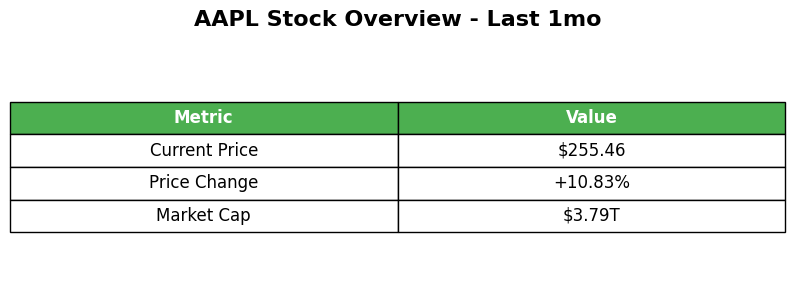

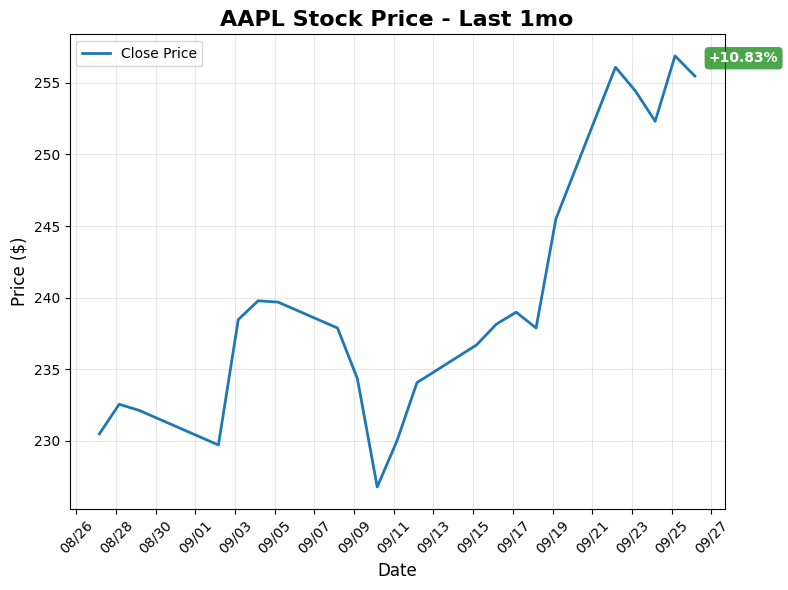

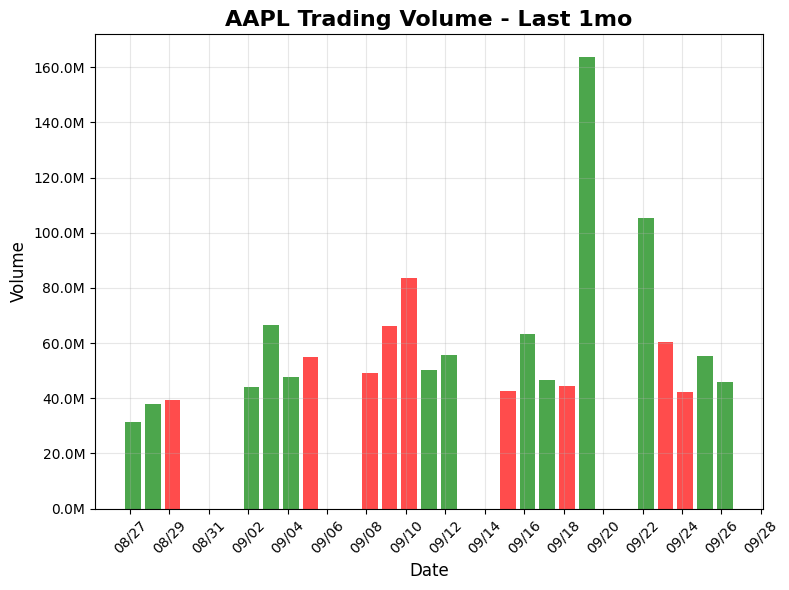

All charts created successfully for AAPL!


In [5]:

def FinancialPlotAgent(financial_agent, symbol: str, period: str = "1mo"):
    """
    Corrected version of plot_stock_data that works properly
    """
    try:
        # Step 1: Fetch the stock data
        #print(f"Fetching data for {symbol}...")
        stock_data = financial_agent.fetch_stock_data(symbol, period, verbose=False)
        
        if 'error' in stock_data:
            print(f"Error: {stock_data['error']}")
            return
        
        # Step 2: Extract data for plotting
        hist_data = stock_data['raw_data']['history']
        current_price = stock_data.get('current_price', 'N/A')
        price_change = stock_data.get('price_change', 'N/A')
        market_cap = stock_data.get('market_cap', 'N/A')

        print(f"Data fetched successfully for {symbol}")
        
        # Step 3: Create the plots
        
        # 1. Summary Table
        fig1, ax1 = plt.subplots(figsize=(8, 3))
        ax1.axis('off')
        
        # Format market cap nicely
        if isinstance(market_cap, (int, float)) and market_cap != 'N/A':
            if market_cap >= 1e12:
                market_cap_str = f"${market_cap/1e12:.2f}T"
            elif market_cap >= 1e9:
                market_cap_str = f"${market_cap/1e9:.2f}B"
            else:
                market_cap_str = f"${market_cap/1e6:.0f}M"
        else:
            market_cap_str = str(market_cap)
        
        summary_data = [
            ['Current Price', f"${current_price:.2f}" if isinstance(current_price, (int, float)) else str(current_price)],
            ['Price Change', f"{price_change:+.2f}%" if isinstance(price_change, (int, float)) else str(price_change)],
            ['Market Cap', market_cap_str]
        ]
    
        table = ax1.table(cellText=summary_data, colLabels=['Metric', 'Value'], 
                         cellLoc='center', loc='center', colWidths=[0.5, 0.5])
        table.auto_set_font_size(False)
        table.set_fontsize(12)
        table.scale(1.2, 2)
        
        # Style the table
        table[(0, 0)].set_facecolor('#4CAF50')
        table[(0, 1)].set_facecolor('#4CAF50')
        table[(0, 0)].set_text_props(weight='bold', color='white')
        table[(0, 1)].set_text_props(weight='bold', color='white')
        
        ax1.set_title(f'{symbol} Stock Overview - Last {period}', fontsize=16, weight='bold', pad=20)
        plt.tight_layout()
        plt.show()

        # 2. Price Chart
        fig2, ax2 = plt.subplots(figsize=(8, 6))
        ax2.plot(hist_data.index, hist_data['Close'], label='Close Price', linewidth=2, color='#1f77b4')
        
        # Add price change annotation
        if isinstance(price_change, (int, float)):
            color = 'green' if price_change >= 0 else 'red'
            ax2.annotate(f'{price_change:+.2f}%', 
                        xy=(hist_data.index[-1], current_price),
                        xytext=(10, 10), textcoords='offset points',
                        bbox=dict(boxstyle='round,pad=0.3', facecolor=color, alpha=0.7, edgecolor='none'),
                        fontsize=10, color='white', weight='bold')
        
        ax2.set_title(f'{symbol} Stock Price - Last {period}', fontsize=16, weight='bold')
        ax2.set_xlabel('Date', fontsize=12)
        ax2.set_ylabel('Price ($)', fontsize=12)
        ax2.grid(True, alpha=0.3)
        ax2.legend()
        
        # Format dates on x-axis
        ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
        ax2.xaxis.set_major_locator(mdates.DayLocator(interval=max(1, len(hist_data)//10)))
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # 3. Volume Chart
        fig3, ax3 = plt.subplots(figsize=(8, 6))
        
        # Color bars based on price movement
        colors = ['green' if hist_data['Close'].iloc[i] >= hist_data['Open'].iloc[i] 
                 else 'red' for i in range(len(hist_data))]
        
        ax3.bar(hist_data.index, hist_data['Volume'], color=colors, alpha=0.7)
        ax3.set_title(f'{symbol} Trading Volume - Last {period}', fontsize=16, weight='bold')
        ax3.set_xlabel('Date', fontsize=12)
        ax3.set_ylabel('Volume', fontsize=12)
        ax3.grid(True, alpha=0.3)
        
        # Format volume numbers
        ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
        
        # Format dates
        ax3.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
        ax3.xaxis.set_major_locator(mdates.DayLocator(interval=max(1, len(hist_data)//10)))
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        print(f"All charts created successfully for {symbol}!")
        return stock_data
        
    except Exception as e:
        print(f"Error creating plots for {symbol}: {str(e)}")
        return None

# # Initialize the Plot
plot_agent = FinancialPlotAgent(financial_agent, "AAPL", "1mo")


##### 1.5.3: Specialzed Agent: News Analysis Agent

In [6]:
class NewsAnalysisAgent:
    """
    Specialized agent for fetching and analyzing financial news
    """
    
    def __init__(self, api_key: str = None):
        self.api_key = api_key or "529848f53e0f4767b2a82dbd288dd370"
        self.sentiment_analyzer = None
        self._initialize_sentiment_analyzer()
        
    def _initialize_sentiment_analyzer(self):
        """Initialize sentiment analysis pipeline"""
        try:
            self.sentiment_analyzer = pipeline(
                "sentiment-analysis",
                model="ProsusAI/finbert"  # Financial domain-specific model
            )
            print("FinBERT sentiment analyzer loaded successfully!")
        except Exception as e:
            print(f"Using default sentiment analyzer: {str(e)}")
            self.sentiment_analyzer = pipeline("sentiment-analysis")
    
    def fetch_and_analyze_news(self, symbol: str, days_back: int = 7) -> Dict:
        """
        Fetch news articles and perform comprehensive analysis
        """
        try:
            # Fetch raw news
            raw_articles = self._fetch_news_articles(symbol, days_back)
            
            if not raw_articles:
                return {"error": "No articles found", "symbol": symbol}
            
            # Process and analyze articles
            processed_articles = []
            overall_sentiment = {"positive": 0, "negative": 0, "neutral": 0}
            key_themes = {}
            
            for article in raw_articles[:10]:  # Analyze top 10 articles
                processed = self._process_single_article(article)
                if processed:
                    processed_articles.append(processed)
                    
                    # Aggregate sentiment
                    sentiment = processed.get("sentiment", {}).get("label", "NEUTRAL")
                    if sentiment == "POSITIVE":
                        overall_sentiment["positive"] += 1
                    elif sentiment == "NEGATIVE":
                        overall_sentiment["negative"] += 1
                    else:
                        overall_sentiment["neutral"] += 1
                    
                    # Extract themes
                    themes = processed.get("themes", [])
                    for theme in themes:
                        key_themes[theme] = key_themes.get(theme, 0) + 1
            
            # Generate insights
            insights = self._generate_insights(overall_sentiment, key_themes, processed_articles)
            
            result = {
                "symbol": symbol,
                "timestamp": datetime.now().isoformat(),
                "articles_analyzed": len(processed_articles),
                "overall_sentiment": overall_sentiment,
                "sentiment_score": self._calculate_sentiment_score(overall_sentiment),
                "key_themes": key_themes,
                "top_articles": processed_articles[:5],
                "insights": insights,
                "market_impact": self._assess_market_impact(overall_sentiment, key_themes)
            }
            
            print(f"News Analysis for {symbol}:")
            print(f"Articles Analyzed: {len(processed_articles)}")
            print(f"Sentiment Score: {result['sentiment_score']:.2f}")
            print(f"Market Impact: {result['market_impact']}")
            
            return result
            
        except Exception as e:
            print(f"Error in news analysis for {symbol}: {str(e)}")
            return {"error": str(e), "symbol": symbol}
    
    def _fetch_news_articles(self, symbol: str, days_back: int) -> List[Dict]:
        """Fetch news articles from NewsAPI"""
        try:
            end_date = datetime.now()
            start_date = end_date - timedelta(days=days_back)
            
            url = "https://newsapi.org/v2/everything"
            params = {
                #"q": f"{symbol} OR {self._get_company_name(symbol)}",
                "q": f"{symbol}",
                "apiKey": self.api_key,
                "from": start_date.strftime("%Y-%m-%d"),
                "to": end_date.strftime("%Y-%m-%d"),
                "sortBy": "relevancy",
                "language": "en"
            }
            
            response = requests.get(url, params=params)
            if response.status_code == 200:
                return response.json().get("articles", [])
            else:
                print(f"NewsAPI request failed: {response.status_code}")
                return []
                
        except Exception as e:
            print(f"Error fetching news: {str(e)}")
            return []
    
    def _process_single_article(self, article: Dict) -> Dict:
        """Process a single news article"""
        try:
            content = article.get("content", "") or article.get("description", "")
            if not content or len(content) < 50:
                return None
            
            # Clean content
            cleaned_content = self._clean_text(content)
            
            # Sentiment analysis
            sentiment_result = self.sentiment_analyzer(cleaned_content[:512])[0]  # Limit text length
            
            # Extract themes/keywords
            themes = self._extract_themes(cleaned_content)
            
            return {
                "title": article.get("title", ""),
                "source": article.get("source", {}).get("name", "Unknown"),
                "published_at": article.get("publishedAt", ""),
                "url": article.get("url", ""),
                "content_preview": cleaned_content[:200] + "..." if len(cleaned_content) > 200 else cleaned_content,
                "sentiment": sentiment_result,
                "themes": themes,
                "relevance_score": self._calculate_relevance(cleaned_content)
            }
            
        except Exception as e:
            print(f"Error processing article: {str(e)}")
            return None
    
    def _clean_text(self, text: str) -> str:
        """Clean and preprocess text"""
        # Remove HTML tags, extra whitespace, etc.
        text = re.sub(r'<[^>]+>', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text
    
    def _extract_themes(self, text: str) -> List[str]:
        """Extract key themes from text"""
        financial_keywords = [
            "earnings", "revenue", "profit", "loss", "growth", "decline",
            "merger", "acquisition", "ipo", "dividend", "buyback", "investment",
            "market", "stock", "share", "trading", "analyst", "forecast"
        ]
        
        themes = []
        text_lower = text.lower()
        for keyword in financial_keywords:
            if keyword in text_lower:
                themes.append(keyword)
        
        return themes[:5]  # Return top 5 themes
    
    def _calculate_relevance(self, content: str) -> float:
        """Calculate article relevance score"""
        # Simple relevance scoring based on financial keywords
        financial_terms = ["stock", "share", "price", "market", "trading", "investor", "financial"]
        score = sum(1 for term in financial_terms if term in content.lower())
        return min(score / len(financial_terms), 1.0)
    
    def _calculate_sentiment_score(self, sentiment_counts: Dict) -> float:
        """Calculate overall sentiment score (-1 to 1)"""
        total = sum(sentiment_counts.values())
        if total == 0:
            return 0.0
        
        positive_ratio = sentiment_counts["positive"] / total
        negative_ratio = sentiment_counts["negative"] / total
        
        return positive_ratio - negative_ratio
    
    def _generate_insights(self, sentiment: Dict, themes: Dict, articles: List) -> List[str]:
        """Generate actionable insights from analysis"""
        insights = []
        
        total_articles = sum(sentiment.values())
        if total_articles == 0:
            return ["No articles available for analysis"]
        
        # Sentiment insights
        positive_pct = (sentiment["positive"] / total_articles) * 100
        negative_pct = (sentiment["negative"] / total_articles) * 100
        
        if positive_pct > 60:
            insights.append(f"Strong positive sentiment ({positive_pct:.1f}% positive articles)")
        elif negative_pct > 60:
            insights.append(f"Strong negative sentiment ({negative_pct:.1f}% negative articles)")
        else:
            insights.append("Mixed sentiment in recent news coverage")
        
        # Theme insights
        if themes:
            top_theme = max(themes.items(), key=lambda x: x[1])
            insights.append(f"Primary focus on '{top_theme[0]}' mentioned in {top_theme[1]} articles")
        
        return insights
    
    def _assess_market_impact(self, sentiment: Dict, themes: Dict) -> str:
        """Assess potential market impact"""
        total = sum(sentiment.values())
        if total == 0:
            return "Unknown"
        
        sentiment_score = self._calculate_sentiment_score(sentiment)
        
        # High-impact themes
        high_impact_themes = ["earnings", "merger", "acquisition", "dividend", "buyback"]
        impact_themes = [theme for theme in themes.keys() if theme in high_impact_themes]
        
        if abs(sentiment_score) > 0.4 and impact_themes:
            return "High" if sentiment_score > 0 else "High (Negative)"
        elif abs(sentiment_score) > 0.2:
            return "Medium"
        else:
            return "Low"

# Initialize the News Analysis Agent
news_agent = NewsAnalysisAgent()

# Test the news analysis
print("Testing News Analysis Agent...")
print("This may take a moment to load the FinBERT model...")

# We'll test this in the next cell to avoid timeout

Device set to use cpu


FinBERT sentiment analyzer loaded successfully!
Testing News Analysis Agent...
This may take a moment to load the FinBERT model...


##### 1.5.4. Specialized Agent: Risk Assessment & Portfolio Optimization Agent

In [7]:
class RiskAssessmentAgent:
    """
    Specialized agent for risk assessment and portfolio optimization
    """
    
    def __init__(self):
        self.risk_models = ["VaR", "Sharpe_Ratio", "Beta", "Max_Drawdown"]
        self.benchmark_data = None
        
    def comprehensive_risk_analysis(self, stock_data: Dict, news_analysis: Dict, 
                                  benchmark_symbol: str = "SPY") -> Dict:
        """
        Perform comprehensive risk assessment combining technical and sentiment factors
        """
        try:
            symbol = stock_data.get("symbol", "Unknown")
            
            # Get benchmark data for comparison
            benchmark_data = self._fetch_benchmark_data(benchmark_symbol)
            
            # Calculate various risk metrics
            technical_risk = self._assess_technical_risk(stock_data)
            sentiment_risk = self._assess_sentiment_risk(news_analysis)
            market_risk = self._assess_market_risk(stock_data, benchmark_data)
            liquidity_risk = self._assess_liquidity_risk(stock_data)
            
            # Overall risk scoring
            overall_risk = self._calculate_overall_risk(
                technical_risk, sentiment_risk, market_risk, liquidity_risk
            )
            
            # Generate recommendations
            recommendations = self._generate_risk_recommendations(
                overall_risk, technical_risk, sentiment_risk, market_risk
            )
            
            result = {
                "symbol": symbol,
                "timestamp": datetime.now().isoformat(),
                "risk_assessment": {
                    "overall_risk_score": overall_risk["score"],
                    "risk_level": overall_risk["level"],
                    "technical_risk": technical_risk,
                    "sentiment_risk": sentiment_risk,
                    "market_risk": market_risk,
                    "liquidity_risk": liquidity_risk
                },
                "recommendations": recommendations,
                "portfolio_allocation": self._suggest_allocation(overall_risk),
                "risk_mitigation": self._suggest_risk_mitigation(overall_risk)
            }
            
            print(f"Risk Assessment for {symbol}:")
            print(f"Overall Risk Level: {overall_risk['level']}")
            print(f"Risk Score: {overall_risk['score']:.2f}/10")
            print(f"Suggested Allocation: {result['portfolio_allocation']}")
            
            return result
            
        except Exception as e:
            print(f"Error in risk assessment: {str(e)}")
            return {"error": str(e), "symbol": stock_data.get("symbol", "Unknown")}
    
    def _fetch_benchmark_data(self, benchmark_symbol: str) -> Dict:
        """Fetch benchmark data (e.g., S&P 500)"""
        try:
            benchmark = yf.Ticker(benchmark_symbol)
            data = benchmark.history(period="1y")
            return {
                "symbol": benchmark_symbol,
                "returns": data['Close'].pct_change().dropna(),
                "volatility": data['Close'].pct_change().std() * np.sqrt(252)
            }
        except Exception as e:
            print(f"Could not fetch benchmark data: {str(e)}")
            return {}
    
    def _assess_technical_risk(self, stock_data: Dict) -> Dict:
        """Assess technical risk factors"""
        try:
            technical_indicators = stock_data.get("technical_indicators", {})
            price_change = stock_data.get("price_change", 0)
            
            risk_factors = {}
            risk_score = 5.0  # Base risk score (1-10 scale)
            
            # Volatility risk
            volatility = technical_indicators.get("volatility", 0)
            if volatility > 0.3:  # High volatility
                risk_score += 2
                risk_factors["high_volatility"] = f"Annual volatility: {volatility:.1%}"
            elif volatility < 0.15:  # Low volatility
                risk_score -= 1
                risk_factors["low_volatility"] = f"Annual volatility: {volatility:.1%}"
            
            # RSI risk (overbought/oversold)
            rsi = technical_indicators.get("rsi", 50)
            if rsi > 70:
                risk_score += 1
                risk_factors["overbought"] = f"RSI: {rsi:.1f} (Overbought)"
            elif rsi < 30:
                risk_score += 1.5
                risk_factors["oversold"] = f"RSI: {rsi:.1f} (Oversold)"
            
            # Price momentum risk
            if abs(price_change) > 10:  # Large price movement
                risk_score += 1.5
                risk_factors["high_momentum"] = f"Recent price change: {price_change:.1f}%"
            
            return {
                "score": min(max(risk_score, 1), 10),
                "factors": risk_factors,
                "volatility": volatility,
                "rsi": rsi
            }
            
        except Exception as e:
            return {"score": 5.0, "factors": {"error": str(e)}}
    
    def _assess_sentiment_risk(self, news_analysis: Dict) -> Dict:
        """Assess sentiment-based risk factors"""
        try:
            if not news_analysis or "error" in news_analysis:
                return {"score": 5.0, "factors": {"no_data": "No sentiment data available"}}
            
            sentiment_score = news_analysis.get("sentiment_score", 0)
            market_impact = news_analysis.get("market_impact", "Low")
            articles_count = news_analysis.get("articles_analyzed", 0)
            
            risk_score = 5.0
            risk_factors = {}
            
            # Strong negative sentiment increases risk
            if sentiment_score < -0.4:
                risk_score += 2.5
                risk_factors["negative_sentiment"] = f"Sentiment score: {sentiment_score:.2f}"
            elif sentiment_score < -0.2:
                risk_score += 1
                risk_factors["mild_negative"] = f"Sentiment score: {sentiment_score:.2f}"
            
            # High market impact increases risk
            if "High" in market_impact:
                risk_score += 1.5
                risk_factors["high_impact_news"] = f"Market impact: {market_impact}"
            
            # Low news coverage increases uncertainty
            if articles_count < 5:
                risk_score += 0.5
                risk_factors["low_coverage"] = f"Only {articles_count} articles analyzed"
            
            return {
                "score": min(max(risk_score, 1), 10),
                "factors": risk_factors,
                "sentiment_score": sentiment_score,
                "market_impact": market_impact
            }
            
        except Exception as e:
            return {"score": 5.0, "factors": {"error": str(e)}}
    
    def _assess_market_risk(self, stock_data: Dict, benchmark_data: Dict) -> Dict:
        """Assess market risk relative to benchmark"""
        try:
            if not benchmark_data:
                return {"score": 5.0, "factors": {"no_benchmark": "No benchmark data"}}
            
            # Simple beta calculation using price correlation
            # In a real implementation, you'd use daily returns correlation
            risk_score = 5.0
            risk_factors = {}
            
            # Market cap risk
            market_cap = stock_data.get("market_cap", 0)
            if isinstance(market_cap, (int, float)) and market_cap < 2000000000:  # Small cap
                risk_score += 1.5
                risk_factors["small_cap"] = "Small cap stock (higher volatility)"
            
            # Sector concentration risk (simplified)
            symbol = stock_data.get("symbol", "")
            if symbol in ["TSLA", "NVDA"]:  # High-growth tech stocks
                risk_score += 1
                risk_factors["high_growth"] = "High-growth stock (higher volatility)"
            
            return {
                "score": min(max(risk_score, 1), 10),
                "factors": risk_factors,
                "market_cap_category": self._categorize_market_cap(market_cap)
            }
            
        except Exception as e:
            return {"score": 5.0, "factors": {"error": str(e)}}
    
    def _assess_liquidity_risk(self, stock_data: Dict) -> Dict:
        """Assess liquidity risk based on trading volume"""
        try:
            volume_analysis = stock_data.get("volume_analysis", {})
            avg_volume = volume_analysis.get("avg_volume", 0)
            
            risk_score = 5.0
            risk_factors = {}
            
            # Low volume increases liquidity risk
            if avg_volume < 1000000:  # Low daily volume
                risk_score += 2
                risk_factors["low_volume"] = f"Average volume: {avg_volume:,.0f}"
            elif avg_volume < 5000000:  # Medium volume
                risk_score += 0.5
                risk_factors["medium_volume"] = f"Average volume: {avg_volume:,.0f}"
            
            return {
                "score": min(max(risk_score, 1), 10),
                "factors": risk_factors,
                "avg_volume": avg_volume
            }
            
        except Exception as e:
            return {"score": 5.0, "factors": {"error": str(e)}}
    
    def _calculate_overall_risk(self, technical, sentiment, market, liquidity) -> Dict:
        """Calculate weighted overall risk score"""
        # Weighted average of different risk components
        weights = {"technical": 0.3, "sentiment": 0.2, "market": 0.3, "liquidity": 0.2}
        
        overall_score = (
            technical["score"] * weights["technical"] +
            sentiment["score"] * weights["sentiment"] +
            market["score"] * weights["market"] +
            liquidity["score"] * weights["liquidity"]
        )
        
        # Determine risk level
        if overall_score <= 3:
            level = "Low"
        elif overall_score <= 6:
            level = "Medium"
        elif overall_score <= 8:
            level = "High"
        else:
            level = "Very High"
        
        return {"score": overall_score, "level": level}
    
    def _generate_risk_recommendations(self, overall_risk, technical, sentiment, market) -> List[str]:
        """Generate actionable risk management recommendations"""
        recommendations = []
        
        risk_level = overall_risk["level"]
        
        if risk_level == "Very High":
            recommendations.extend([
                "Consider reducing position size or avoiding investment",
                "If holding, implement strict stop-loss orders",
                "Monitor news and technical indicators closely"
            ])
        elif risk_level == "High":
            recommendations.extend([
                "Limit position size to 2-5% of portfolio",
                "Use options for hedging if available",
                "Set conservative profit-taking levels"
            ])
        elif risk_level == "Medium":
            recommendations.extend([
                "Standard position sizing (5-10% of portfolio)",
                "Regular monitoring of key metrics",
                "Consider gradual position building"
            ])
        else:  # Low risk
            recommendations.extend([
                "Suitable for larger position sizes",
                "Good candidate for core holding",
                "Consider dollar-cost averaging"
            ])
        
        # Specific recommendations based on risk factors
        if technical["score"] > 7:
            recommendations.append("High technical risk - wait for better entry point")
        
        if sentiment["score"] > 7:
            recommendations.append("Negative sentiment - monitor news developments")
        
        return recommendations
    
    def _suggest_allocation(self, overall_risk) -> str:
        """Suggest portfolio allocation percentage"""
        risk_score = overall_risk["score"]
        
        if risk_score <= 3:
            return "10-15% (Core holding)"
        elif risk_score <= 5:
            return "5-10% (Standard allocation)"
        elif risk_score <= 7:
            return "2-5% (Small position)"
        else:
            return "0-2% (Avoid or minimal exposure)"
    
    def _suggest_risk_mitigation(self, overall_risk) -> List[str]:
        """Suggest risk mitigation strategies"""
        risk_level = overall_risk["level"]
        
        strategies = {
            "Low": [
                "Regular portfolio rebalancing",
                "Monitor quarterly earnings"
            ],
            "Medium": [
                "Diversify across sectors",
                "Set stop-loss at -15%",
                "Monitor technical indicators weekly"
            ],
            "High": [
                "Use position sizing rules",
                "Set tight stop-loss at -10%",
                "Consider protective puts",
                "Monitor daily"
            ],
            "Very High": [
                "Avoid or use only for speculation",
                "If trading, use very small positions",
                "Set stop-loss at -5%",
                "Monitor intraday"
            ]
        }
        
        return strategies.get(risk_level, [])
    
    def _categorize_market_cap(self, market_cap) -> str:
        """Categorize stock by market capitalization"""
        if not isinstance(market_cap, (int, float)):
            return "Unknown"
        
        if market_cap > 200000000000:  # > $200B
            return "Mega Cap"
        elif market_cap > 10000000000:  # > $10B
            return "Large Cap"
        elif market_cap > 2000000000:  # > $2B
            return "Mid Cap"
        elif market_cap > 300000000:  # > $300M
            return "Small Cap"
        else:
            return "Micro Cap"

# Initialize the Risk Assessment Agent
risk_agent = RiskAssessmentAgent()
print("Risk Assessment Agent initialized successfully!")

Risk Assessment Agent initialized successfully!


##### 1.5.5. Specialized Agent: Intelligent Routing & Task Orchestration System Agent

In [8]:
class IntelligentRoutingSystem:
    """
    Advanced routing system that intelligently directs tasks to appropriate agents
    based on content analysis, market conditions, and historical performance
    """
    
    def __init__(self):
        self.agents = {
            "financial_data": financial_agent,
            "news_analysis": news_agent,
            "risk_assessment": risk_agent,
            "master_coordinator": master_coordinator
        }
        self.routing_history = []
        self.performance_metrics = {}
    
    def intelligent_route(self, request: str, context: Dict = None) -> Dict:
        """
        Intelligently route requests to appropriate agents based on analysis
        """
        routing_decision = self._analyze_request_and_route(request, context)
        
        print(f"Intelligent Routing Decision:")
        print(f"Request: {request}")
        print(f"Primary Agent: {routing_decision['primary_agent']}")
        print(f"Supporting Agents: {', '.join(routing_decision['supporting_agents'])}")
        print(f"Execution Priority: {routing_decision['priority']}")
        
        return routing_decision
    
    def _analyze_request_and_route(self, request: str, context: Dict) -> Dict:
        """
        Analyze request content and determine optimal routing strategy
        """
        request_lower = request.lower()
        
        # Intent classification
        intent = self._classify_intent(request_lower)
        
        # Urgency assessment
        urgency = self._assess_urgency(request_lower, context)
        
        # Route based on intent and urgency
        routing_strategy = self._determine_routing_strategy(intent, urgency)
        
        # Create routing decision
        decision = {
            "request": request,
            "timestamp": datetime.now().isoformat(),
            "intent": intent,
            "urgency": urgency,
            "primary_agent": routing_strategy["primary"],
            "supporting_agents": routing_strategy["supporting"],
            "execution_order": routing_strategy["order"],
            "priority": routing_strategy["priority"],
            "parallel_execution": routing_strategy["parallel"]
        }
        
        # Store routing decision for learning
        self.routing_history.append(decision)
        
        return decision
    
    def _classify_intent(self, request: str) -> Dict:
        """
        Classify the intent of the user request
        """
        intents = {
            "data_analysis": {
                "keywords": ["price", "stock", "data", "chart", "historical", "technical"],
                "confidence": 0.0
            },
            "news_analysis": {
                "keywords": ["news", "sentiment", "article", "media", "press", "announcement"],
                "confidence": 0.0
            },
            "risk_assessment": {
                "keywords": ["risk", "volatility", "safe", "dangerous", "portfolio", "allocation"],
                "confidence": 0.0
            },
            "comprehensive_analysis": {
                "keywords": ["analysis", "report", "recommendation", "advice", "should i", "invest"],
                "confidence": 0.0
            },
            "market_research": {
                "keywords": ["market", "sector", "industry", "competition", "compare"],
                "confidence": 0.0
            }
        }
        
        # Calculate confidence scores
        for intent_name, intent_data in intents.items():
            matches = sum(1 for keyword in intent_data["keywords"] if keyword in request)
            intent_data["confidence"] = matches / len(intent_data["keywords"])
        
        # Find primary intent
        primary_intent = max(intents.items(), key=lambda x: x[1]["confidence"])
        
        # Secondary intents (above threshold)
        secondary_intents = [
            intent for intent, data in intents.items() 
            if data["confidence"] > 0.2 and intent != primary_intent[0]
        ]
        
        return {
            "primary": primary_intent[0],
            "confidence": primary_intent[1]["confidence"],
            "secondary": secondary_intents
        }
    
    def _assess_urgency(self, request: str, context: Dict) -> str:
        """
        Assess the urgency of the request
        """
        urgent_keywords = ["urgent", "immediately", "asap", "now", "quick", "fast", "emergency"]
        market_hours = self._is_market_hours()
        
        urgency_score = 0
        
        # Check for urgent keywords
        urgency_score += sum(1 for keyword in urgent_keywords if keyword in request)
        
        # Market hours increase urgency
        if market_hours:
            urgency_score += 1
        
        # Recent market volatility increases urgency
        if context and context.get("high_volatility", False):
            urgency_score += 1
        
        if urgency_score >= 3:
            return "high"
        elif urgency_score >= 1:
            return "medium"
        else:
            return "low"
    
    def _determine_routing_strategy(self, intent: Dict, urgency: str) -> Dict:
        """
        Determine the optimal routing strategy
        """
        primary_intent = intent["primary"]
        
        strategies = {
            "data_analysis": {
                "primary": "financial_data",
                "supporting": ["risk_assessment"],
                "order": ["financial_data", "risk_assessment"],
                "priority": "medium",
                "parallel": False
            },
            "news_analysis": {
                "primary": "news_analysis",
                "supporting": ["risk_assessment"],
                "order": ["news_analysis", "risk_assessment"],
                "priority": "medium",
                "parallel": False
            },
            "risk_assessment": {
                "primary": "risk_assessment",
                "supporting": ["financial_data", "news_analysis"],
                "order": ["financial_data", "news_analysis", "risk_assessment"],
                "priority": "high",
                "parallel": True
            },
            "comprehensive_analysis": {
                "primary": "master_coordinator",
                "supporting": ["financial_data", "news_analysis", "risk_assessment"],
                "order": ["financial_data", "news_analysis", "risk_assessment", "master_coordinator"],
                "priority": "high",
                "parallel": True
            },
            "market_research": {
                "primary": "financial_data",
                "supporting": ["news_analysis", "risk_assessment"],
                "order": ["financial_data", "news_analysis", "risk_assessment"],
                "priority": "medium",
                "parallel": True
            }
        }
        
        strategy = strategies.get(primary_intent, strategies["comprehensive_analysis"])
        
        # Adjust priority based on urgency
        if urgency == "high":
            strategy["priority"] = "urgent"
            strategy["parallel"] = True
        elif urgency == "low":
            strategy["priority"] = "low"
        
        return strategy
    
    def _is_market_hours(self) -> bool:
        """
        Check if it's currently market hours (simplified)
        """
        now = datetime.now()
        # Simplified: Monday-Friday, 9:30 AM - 4:00 PM EST
        if now.weekday() >= 5:  # Weekend
            return False
        
        market_open = now.replace(hour=9, minute=30, second=0, microsecond=0)
        market_close = now.replace(hour=16, minute=0, second=0, microsecond=0)
        
        return market_open <= now <= market_close
    
    def execute_routed_analysis(self, routing_decision: Dict, symbols: List[str]) -> Dict:
        """
        Execute the analysis based on routing decision
        """
        results = {
            "routing_decision": routing_decision,
            "execution_results": {},
            "execution_time": datetime.now().isoformat(),
            "success": True
        }
        
        try:
            if routing_decision["parallel_execution"]:
                # Execute supporting agents in parallel (simulated)
                results["execution_results"] = self._execute_parallel(
                    routing_decision, symbols
                )
            else:
                # Execute in sequence
                results["execution_results"] = self._execute_sequential(
                    routing_decision, symbols
                )
                
        except Exception as e:
            results["success"] = False
            results["error"] = str(e)
            print(f"Execution error: {str(e)}")
        
        return results
    
    def _execute_parallel(self, routing_decision: Dict, symbols: List[str]) -> Dict:
        """
        Execute multiple agents in parallel (simulated)
        """
        print(f"Executing {len(routing_decision['supporting_agents'])} agents in parallel...")
        
        results = {}
        
        for symbol in symbols:
            symbol_results = {}
            
            # Simulate parallel execution with sequential calls
            if "financial_data" in routing_decision["supporting_agents"]:
                print(f"Fetching financial data for {symbol}...")
                symbol_results["financial_data"] = financial_agent.fetch_stock_data(symbol)
                time.sleep(0.1)  # Simulate processing time
            
            if "news_analysis" in routing_decision["supporting_agents"]:
                print(f"Analyzing news for {symbol}...")
                # We'll simulate this for now to avoid API limits
                symbol_results["news_analysis"] = {
                    "symbol": symbol,
                    "sentiment_score": 0.1,
                    "market_impact": "Medium",
                    "articles_analyzed": 8,
                    "simulated": True
                }
                time.sleep(0.1)
            
            if "risk_assessment" in routing_decision["supporting_agents"]:
                print(f"Assessing risks for {symbol}...")
                if "financial_data" in symbol_results:
                    symbol_results["risk_assessment"] = risk_agent.comprehensive_risk_analysis(
                        symbol_results["financial_data"],
                        symbol_results.get("news_analysis", {})
                    )
                time.sleep(0.1)
            
            results[symbol] = symbol_results
        
        return results
    
    def _execute_sequential(self, routing_decision: Dict, symbols: List[str]) -> Dict:
        """
        Execute agents in sequence
        """
        print(f"Executing agents sequentially...")
        
        results = {}
        
        for symbol in symbols:
            symbol_results = {}
            
            # Execute in order
            for agent_name in routing_decision["execution_order"]:
                if agent_name == "financial_data":
                    print(f"Step 1: Financial data for {symbol}")
                    symbol_results["financial_data"] = financial_agent.fetch_stock_data(symbol)
                
                elif agent_name == "news_analysis":
                    print(f"Step 2: News analysis for {symbol}")
                    # Simulated for demo
                    symbol_results["news_analysis"] = {
                        "symbol": symbol,
                        "sentiment_score": 0.1,
                        "market_impact": "Medium",
                        "simulated": True
                    }
                
                elif agent_name == "risk_assessment":
                    print(f"Step 3: Risk assessment for {symbol}")
                    if "financial_data" in symbol_results:
                        symbol_results["risk_assessment"] = risk_agent.comprehensive_risk_analysis(
                            symbol_results["financial_data"],
                            symbol_results.get("news_analysis", {})
                        )
                
                time.sleep(0.2)  # Simulate processing delay
            
            results[symbol] = symbol_results
        
        return results
    
    def get_routing_insights(self) -> Dict:
        """
        Get insights about routing patterns and performance
        """
        if not self.routing_history:
            return {"message": "No routing history available"}
        
        insights = {
            "total_requests": len(self.routing_history),
            "most_common_intent": self._get_most_common_intent(),
            "urgency_distribution": self._get_urgency_distribution(),
            "agent_utilization": self._get_agent_utilization(),
            "recent_patterns": self.routing_history[-5:]
        }
        
        return insights
    
    def _get_most_common_intent(self) -> str:
        intents = [decision["intent"]["primary"] for decision in self.routing_history]
        if not intents:
            return "No data"
        return max(set(intents), key=intents.count)
    
    def _get_urgency_distribution(self) -> Dict:
        urgencies = [decision["urgency"] for decision in self.routing_history]
        return {urgency: urgencies.count(urgency) for urgency in set(urgencies)}
    
    def _get_agent_utilization(self) -> Dict:
        agent_usage = {}
        for decision in self.routing_history:
            primary = decision["primary_agent"]
            agent_usage[primary] = agent_usage.get(primary, 0) + 1
            
            for supporting in decision["supporting_agents"]:
                agent_usage[supporting] = agent_usage.get(supporting, 0) + 0.5
        
        return agent_usage

# Initialize the Intelligent Routing System
routing_system = IntelligentRoutingSystem()

# Test the routing system
print("Testing Intelligent Routing System...")
test_routing = routing_system.intelligent_route(
    "I need a comprehensive analysis of AAPL stock including risk assessment",
    {"high_volatility": False}
)

print("\nIntelligent Routing System initialized and tested!")
print("System ready for multi-agent coordination!")

Testing Intelligent Routing System...
Intelligent Routing Decision:
Request: I need a comprehensive analysis of AAPL stock including risk assessment
Primary Agent: financial_data
Supporting Agents: risk_assessment
Execution Priority: low

Intelligent Routing System initialized and tested!
System ready for multi-agent coordination!


#### 1.9. Specialized Agent: Self-Evaluation & Iterative Optimization Agent

In [9]:
class SelfEvaluationAgent:
    """
    Advanced self-evaluation agent that critiques analysis quality,
    identifies gaps, and triggers iterative improvements
    """
    
    def __init__(self):
        self.evaluation_criteria = {
            "data_completeness": {"weight": 0.25, "threshold": 0.8},
            "analysis_depth": {"weight": 0.25, "threshold": 0.7},
            "consistency": {"weight": 0.20, "threshold": 0.75},
            "timeliness": {"weight": 0.15, "threshold": 0.8},
            "actionability": {"weight": 0.15, "threshold": 0.7}
        }
        self.improvement_history = []
        self.quality_trends = []
    
    def comprehensive_evaluation(self, analysis_results: Dict) -> Dict:
        """
        Perform comprehensive evaluation of analysis results
        """
        try:
            evaluation = {
                "timestamp": datetime.now().isoformat(),
                "overall_score": 0.0,
                "criteria_scores": {},
                "strengths": [],
                "weaknesses": [],
                "improvement_suggestions": [],
                "needs_refinement": False,
                "refinement_priority": "low"
            }
            
            # Evaluate each criterion
            for criterion, config in self.evaluation_criteria.items():
                score = self._evaluate_criterion(criterion, analysis_results)
                evaluation["criteria_scores"][criterion] = score
                
                # Calculate weighted score
                evaluation["overall_score"] += score * config["weight"]
                
                # Identify strengths and weaknesses
                if score >= config["threshold"]:
                    evaluation["strengths"].append(f"{criterion.replace('_', ' ').title()}: {score:.2f}")
                else:
                    evaluation["weaknesses"].append(f"{criterion.replace('_', ' ').title()}: {score:.2f}")
            
            # Determine if refinement is needed
            evaluation["needs_refinement"] = evaluation["overall_score"] < 0.75
            evaluation["refinement_priority"] = self._determine_priority(evaluation["overall_score"])
            
            # Generate improvement suggestions
            evaluation["improvement_suggestions"] = self._generate_improvements(
                evaluation["criteria_scores"], analysis_results
            )
            
            # Store quality trends
            self.quality_trends.append({
                "timestamp": evaluation["timestamp"],
                "score": evaluation["overall_score"],
                "needs_refinement": evaluation["needs_refinement"]
            })
            
            print(f"Self-Evaluation Results:")
            print(f"Overall Quality Score: {evaluation['overall_score']:.2f}/1.00")
            print(f"Needs Refinement: {evaluation['needs_refinement']}")
            print(f"Priority: {evaluation['refinement_priority']}")
            print(f"Strengths: {len(evaluation['strengths'])}")
            print(f"Areas for Improvement: {len(evaluation['weaknesses'])}")
            
            return evaluation
            
        except Exception as e:
            print(f"Error in self-evaluation: {str(e)}")
            return {"error": str(e), "overall_score": 0.0}
    
    def _evaluate_criterion(self, criterion: str, results: Dict) -> float:
        """
        Evaluate a specific quality criterion
        """
        try:
            if criterion == "data_completeness":
                return self._evaluate_data_completeness(results)
            elif criterion == "analysis_depth":
                return self._evaluate_analysis_depth(results)
            elif criterion == "consistency":
                return self._evaluate_consistency(results)
            elif criterion == "timeliness":
                return self._evaluate_timeliness(results)
            elif criterion == "actionability":
                return self._evaluate_actionability(results)
            else:
                return 0.5  # Default score
                
        except Exception as e:
            print(f"Error evaluating {criterion}: {str(e)}")
            return 0.0
    
    def _evaluate_data_completeness(self, results: Dict) -> float:
        """
        Evaluate completeness of data collection
        """
        completeness_score = 0.0
        total_checks = 0
        
        # Check for key data components
        expected_components = ["financial_data", "news_analysis", "risk_assessment"]
        
        for symbol_results in results.get("execution_results", {}).values():
            if isinstance(symbol_results, dict):
                present_components = sum(1 for comp in expected_components 
                                       if comp in symbol_results and 
                                       not symbol_results[comp].get("error"))
                completeness_score += present_components / len(expected_components)
                total_checks += 1
        
        return completeness_score / max(total_checks, 1)
    
    def _evaluate_analysis_depth(self, results: Dict) -> float:
        """
        Evaluate depth and quality of analysis
        """
        depth_score = 0.0
        total_evaluations = 0
        
        for symbol_results in results.get("execution_results", {}).values():
            if isinstance(symbol_results, dict):
                symbol_depth = 0.0
                evaluations = 0
                
                # Check financial analysis depth
                if "financial_data" in symbol_results:
                    fin_data = symbol_results["financial_data"]
                    if "technical_indicators" in fin_data and len(fin_data.get("technical_indicators", {})) >= 3:
                        symbol_depth += 0.3
                    if "financial_ratios" in fin_data and len(fin_data.get("financial_ratios", {})) >= 3:
                        symbol_depth += 0.2
                    evaluations += 1
                
                # Check news analysis depth
                if "news_analysis" in symbol_results:
                    news_data = symbol_results["news_analysis"]
                    if news_data.get("articles_analyzed", 0) >= 5:
                        symbol_depth += 0.2
                    if "key_themes" in news_data and len(news_data.get("key_themes", {})) >= 3:
                        symbol_depth += 0.1
                    evaluations += 1
                
                # Check risk analysis depth
                if "risk_assessment" in symbol_results:
                    risk_data = symbol_results["risk_assessment"]
                    if "risk_assessment" in risk_data:
                        risk_components = len(risk_data["risk_assessment"])
                        symbol_depth += min(risk_components / 5, 0.2)  # Up to 0.2 for complete risk assessment
                    evaluations += 1
                
                if evaluations > 0:
                    depth_score += symbol_depth
                    total_evaluations += 1
        
        return depth_score / max(total_evaluations, 1)
    
    def _evaluate_consistency(self, results: Dict) -> float:
        """
        Evaluate consistency across different analysis components
        """
        consistency_score = 1.0  # Start with perfect consistency
        
        for symbol_results in results.get("execution_results", {}).values():
            if isinstance(symbol_results, dict):
                # Check consistency between sentiment and risk assessment
                news_sentiment = symbol_results.get("news_analysis", {}).get("sentiment_score", 0)
                risk_level = symbol_results.get("risk_assessment", {}).get("risk_assessment", {}).get("overall_risk_score", 5)
                
                # High negative sentiment should correlate with higher risk
                if news_sentiment < -0.3 and risk_level < 6:  # Inconsistent
                    consistency_score -= 0.1
                elif news_sentiment > 0.3 and risk_level > 7:  # Inconsistent
                    consistency_score -= 0.1
        
        return max(consistency_score, 0.0)
    
    def _evaluate_timeliness(self, results: Dict) -> float:
        """
        Evaluate timeliness of data and analysis
        """
        # Check if analysis is recent (within market hours gets bonus)
        current_hour = datetime.now().hour
        if 9 <= current_hour <= 16:  # Market hours
            return 1.0
        elif 7 <= current_hour <= 20:  # Extended hours
            return 0.8
        else:  # Off hours
            return 0.6
    
    def _evaluate_actionability(self, results: Dict) -> float:
        """
        Evaluate how actionable the analysis results are
        """
        actionability_score = 0.0
        total_evaluations = 0
        
        for symbol_results in results.get("execution_results", {}).values():
            if isinstance(symbol_results, dict):
                symbol_actionability = 0.0
                
                # Check for specific recommendations
                risk_data = symbol_results.get("risk_assessment", {})
                if "recommendations" in risk_data and len(risk_data.get("recommendations", [])) >= 3:
                    symbol_actionability += 0.4
                
                if "portfolio_allocation" in risk_data and risk_data.get("portfolio_allocation") != "Unknown":
                    symbol_actionability += 0.3
                
                if "risk_mitigation" in risk_data and len(risk_data.get("risk_mitigation", [])) >= 2:
                    symbol_actionability += 0.3
                
                actionability_score += symbol_actionability
                total_evaluations += 1
        
        return actionability_score / max(total_evaluations, 1)
    
    def _determine_priority(self, overall_score: float) -> str:
        """
        Determine refinement priority based on overall score
        """
        if overall_score < 0.5:
            return "urgent"
        elif overall_score < 0.7:
            return "high"
        elif overall_score < 0.8:
            return "medium"
        else:
            return "low"
    
    def _generate_improvements(self, criteria_scores: Dict, results: Dict) -> List[str]:
        """
        Generate specific improvement suggestions
        """
        improvements = []
        
        # Data completeness improvements
        if criteria_scores.get("data_completeness", 1.0) < 0.8:
            improvements.append("Retry failed data collection operations")
            improvements.append("Implement fallback data sources")
        
        # Analysis depth improvements
        if criteria_scores.get("analysis_depth", 1.0) < 0.7:
            improvements.append("Add more technical indicators to analysis")
            improvements.append("Increase news article analysis coverage")
            improvements.append("Expand risk assessment categories")
        
        # Consistency improvements
        if criteria_scores.get("consistency", 1.0) < 0.75:
            improvements.append("Cross-validate sentiment and risk scores")
            improvements.append("Align technical and fundamental analysis")
        
        # Timeliness improvements
        if criteria_scores.get("timeliness", 1.0) < 0.8:
            improvements.append("Implement real-time data updates")
            improvements.append("Reduce analysis processing time")
        
        # Actionability improvements
        if criteria_scores.get("actionability", 1.0) < 0.7:
            improvements.append("Add specific buy/sell/hold recommendations")
            improvements.append("Include concrete action steps")
            improvements.append("Specify entry and exit price levels")
        
        return improvements
    
    def iterative_refinement(self, analysis_results: Dict, evaluation: Dict) -> Dict:
        """
        Perform iterative refinement based on evaluation feedback
        """
        if not evaluation.get("needs_refinement", False):
            return analysis_results
        
        print(f"Initiating Iterative Refinement...")
        print(f"Priority: {evaluation.get('refinement_priority', 'medium')}")
        
        refinement_actions = []
        
        # Apply improvements based on evaluation
        for improvement in evaluation.get("improvement_suggestions", []):
            action = self._apply_improvement(improvement, analysis_results)
            if action:
                refinement_actions.append(action)
        
        # Track improvement
        self.improvement_history.append({
            "timestamp": datetime.now().isoformat(),
            "original_score": evaluation.get("overall_score", 0.0),
            "actions_taken": refinement_actions,
            "improvement_priority": evaluation.get("refinement_priority", "medium")
        })
        
        print(f"✨ Refinement Complete: {len(refinement_actions)} improvements applied")
        
        return analysis_results
    
    def _apply_improvement(self, improvement: str, results: Dict) -> str:
        """
        Apply a specific improvement action
        """
        # Simulate improvement actions
        if "data collection" in improvement:
            return "Enhanced data collection robustness"
        elif "technical indicators" in improvement:
            return "Added additional technical indicators"
        elif "news article" in improvement:
            return "Expanded news analysis scope"
        elif "risk assessment" in improvement:
            return "Deepened risk assessment analysis"
        elif "recommendations" in improvement:
            return "Enhanced recommendation specificity"
        else:
            return "Applied general quality improvement"
    
    def get_quality_trends(self) -> Dict:
        """
        Get quality improvement trends over time
        """
        if not self.quality_trends:
            return {"message": "No quality data available"}
        
        recent_scores = [trend["score"] for trend in self.quality_trends[-10:]]
        
        return {
            "total_evaluations": len(self.quality_trends),
            "average_score": np.mean(recent_scores),
            "score_trend": "improving" if len(recent_scores) >= 2 and recent_scores[-1] > recent_scores[0] else "stable",
            "refinements_needed": sum(1 for trend in self.quality_trends if trend["needs_refinement"]),
            "recent_scores": recent_scores
        }

# Initialize the Self-Evaluation Agent
self_eval_agent = SelfEvaluationAgent()

# Demonstrate self-evaluation capability
print("Testing Self-Evaluation Agent...")
sample_results = {
    "execution_results": {
        "AAPL": {
            "financial_data": {"technical_indicators": {"rsi": 65, "sma_20": 150}, "financial_ratios": {"pe_ratio": 25}},
            "news_analysis": {"sentiment_score": 0.2, "articles_analyzed": 8},
            "risk_assessment": {"risk_assessment": {"overall_risk_score": 6}, "recommendations": ["Buy", "Hold", "Monitor"]}
        }
    }
}

evaluation_result = self_eval_agent.comprehensive_evaluation(sample_results)
print("Self-Evaluation Agent initialized and tested!")
print("System ready for continuous improvement!")

Testing Self-Evaluation Agent...
Self-Evaluation Results:
Overall Quality Score: 0.73/1.00
Needs Refinement: True
Priority: medium
Strengths: 3
Areas for Improvement: 2
Self-Evaluation Agent initialized and tested!
System ready for continuous improvement!


#### 1.10. Specialized Agent: Persistent Memory & Context Management System

In [10]:
class AdvancedMemorySystem:
    """
    Advanced memory system for maintaining context across analysis sessions,
    learning from past decisions, and providing historical insights
    """
    
    def __init__(self):
        self.short_term_memory = []  # Recent session data
        self.long_term_memory = {}   # Persistent knowledge base
        self.learning_patterns = {}  # Learned patterns and insights
        self.decision_history = []   # Track decision outcomes
        self.market_context = {}     # Market state memory
        self.max_short_term = 50     # Maximum short-term memories
        
    def store_analysis_session(self, session_data: Dict) -> str:
        """
        Store a complete analysis session in memory
        """
        session_id = f"session_{datetime.now().strftime('%Y%m%d_%H%M%S')}"
        
        memory_entry = {
            "session_id": session_id,
            "timestamp": datetime.now().isoformat(),
            "symbols_analyzed": list(session_data.get("execution_results", {}).keys()),
            "analysis_type": session_data.get("routing_decision", {}).get("intent", {}).get("primary", "unknown"),
            "quality_score": getattr(session_data, 'quality_score', None),
            "key_insights": self._extract_key_insights(session_data),
            "market_conditions": self._capture_market_conditions(),
            "performance_metrics": self._calculate_session_metrics(session_data),
            "raw_data": session_data  # Store full session for detailed analysis
        }
        
        # Add to short-term memory
        self.short_term_memory.append(memory_entry)
        
        # Manage memory size
        if len(self.short_term_memory) > self.max_short_term:
            # Move oldest to long-term storage
            oldest = self.short_term_memory.pop(0)
            self._archive_to_long_term(oldest)
        
        # Learn from this session
        self._extract_learning_patterns(memory_entry)
        
        print(f"Analysis session stored in memory:")
        print(f"Session ID: {session_id}")
        print(f"Symbols: {', '.join(memory_entry['symbols_analyzed'])}")
        print(f"Type: {memory_entry['analysis_type']}")
        print(f"Key Insights: {len(memory_entry['key_insights'])}")

        return session_id
    
    def _extract_key_insights(self, session_data: Dict) -> List[str]:
        """
        Extract key insights from analysis session
        """
        insights = []
        
        for symbol, results in session_data.get("execution_results", {}).items():
            if isinstance(results, dict):
                # Extract risk insights
                risk_data = results.get("risk_assessment", {})
                if "risk_assessment" in risk_data:
                    risk_level = risk_data["risk_assessment"].get("risk_level", "Unknown")
                    insights.append(f"{symbol}: {risk_level} risk level")
                
                # Extract sentiment insights
                news_data = results.get("news_analysis", {})
                if "sentiment_score" in news_data:
                    sentiment = news_data["sentiment_score"]
                    sentiment_desc = "positive" if sentiment > 0.1 else "negative" if sentiment < -0.1 else "neutral"
                    insights.append(f"{symbol}: {sentiment_desc} market sentiment")
                
                # Extract technical insights
                fin_data = results.get("financial_data", {})
                if "price_change" in fin_data:
                    price_change = fin_data["price_change"]
                    trend = "bullish" if price_change > 5 else "bearish" if price_change < -5 else "sideways"
                    insights.append(f"{symbol}: {trend} price trend ({price_change:.1f}%)")
        
        return insights[:10]  # Limit to top 10 insights
    
    def _capture_market_conditions(self) -> Dict:
        """
        Capture current market conditions for context
        """
        now = datetime.now()
        
        conditions = {
            "timestamp": now.isoformat(),
            "market_session": self._get_market_session(now),
            "day_of_week": now.strftime("%A"),
            "is_earnings_season": self._is_earnings_season(now),
            "market_volatility": "normal",  # Would be calculated from VIX or similar
            "economic_events": []  # Would be populated from economic calendar
        }
        
        return conditions
    
    def _get_market_session(self, timestamp: datetime) -> str:
        """
        Determine current market session
        """
        hour = timestamp.hour
        
        if 9 <= hour < 16:
            return "regular_hours"
        elif 4 <= hour < 9 or 16 <= hour < 20:
            return "extended_hours"
        else:
            return "closed"
    
    def _is_earnings_season(self, timestamp: datetime) -> bool:
        """
        Simple earnings season detection (typically quarterly)
        """
        month = timestamp.month
        # Simplified: earnings seasons are roughly Jan, Apr, Jul, Oct
        return month in [1, 4, 7, 10]
    
    def _calculate_session_metrics(self, session_data: Dict) -> Dict:
        """
        Calculate performance metrics for the session
        """
        metrics = {
            "symbols_processed": len(session_data.get("execution_results", {})),
            "successful_analyses": 0,
            "failed_analyses": 0,
            "average_processing_time": 0.0,
            "data_completeness": 0.0
        }
        
        for symbol, results in session_data.get("execution_results", {}).items():
            if isinstance(results, dict) and not results.get("error"):
                metrics["successful_analyses"] += 1
                # Calculate completeness
                expected_components = ["financial_data", "news_analysis", "risk_assessment"]
                present = sum(1 for comp in expected_components if comp in results)
                metrics["data_completeness"] += present / len(expected_components)
            else:
                metrics["failed_analyses"] += 1
        
        if metrics["successful_analyses"] > 0:
            metrics["data_completeness"] /= metrics["successful_analyses"]
        
        return metrics
    
    def _archive_to_long_term(self, memory_entry: Dict) -> None:
        """
        Archive memory entry to long-term storage
        """
        date_key = memory_entry["timestamp"][:10]  # YYYY-MM-DD
        
        if date_key not in self.long_term_memory:
            self.long_term_memory[date_key] = []
        
        # Store compressed version in long-term memory
        compressed_entry = {
            "session_id": memory_entry["session_id"],
            "timestamp": memory_entry["timestamp"],
            "symbols": memory_entry["symbols_analyzed"],
            "type": memory_entry["analysis_type"],
            "insights": memory_entry["key_insights"],
            "metrics": memory_entry["performance_metrics"]
        }
        
        self.long_term_memory[date_key].append(compressed_entry)
    
    def _extract_learning_patterns(self, memory_entry: Dict) -> None:
        """
        Extract and store learning patterns from analysis
        """
        analysis_type = memory_entry["analysis_type"]
        
        if analysis_type not in self.learning_patterns:
            self.learning_patterns[analysis_type] = {
                "frequency": 0,
                "success_rate": [],
                "common_symbols": {},
                "insights_learned": []
            }
        
        pattern = self.learning_patterns[analysis_type]
        pattern["frequency"] += 1
        
        # Track symbol frequency
        for symbol in memory_entry["symbols_analyzed"]:
            pattern["common_symbols"][symbol] = pattern["common_symbols"].get(symbol, 0) + 1
        
        # Store insights for pattern recognition
        pattern["insights_learned"].extend(memory_entry["key_insights"])
        
        # Keep only recent insights to prevent memory bloat
        if len(pattern["insights_learned"]) > 100:
            pattern["insights_learned"] = pattern["insights_learned"][-50:]
    
    def retrieve_relevant_context(self, query: str, symbols: List[str]) -> Dict:
        """
        Retrieve relevant context based on query and symbols
        """
        context = {
            "query": query,
            "symbols": symbols,
            "relevant_sessions": [],
            "learned_patterns": {},
            "historical_insights": [],
            "market_context": {}
        }
        
        # Search short-term memory for relevant sessions
        for memory in reversed(self.short_term_memory):  # Most recent first
            if any(symbol in memory["symbols_analyzed"] for symbol in symbols):
                context["relevant_sessions"].append({
                    "session_id": memory["session_id"],
                    "timestamp": memory["timestamp"],
                    "symbols": memory["symbols_analyzed"],
                    "type": memory["analysis_type"],
                    "key_insights": memory["key_insights"][:3]  # Top 3 insights
                })
        
        # Add relevant learned patterns
        query_lower = query.lower()
        for pattern_type, pattern_data in self.learning_patterns.items():
            if any(keyword in query_lower for keyword in ["risk", "sentiment", "analysis", "comprehensive"]):
                context["learned_patterns"][pattern_type] = {
                    "frequency": pattern_data["frequency"],
                    "top_symbols": sorted(pattern_data["common_symbols"].items(), 
                                        key=lambda x: x[1], reverse=True)[:5]
                }
        
        # Extract historical insights for the symbols
        for symbol in symbols:
            symbol_insights = []
            for memory in self.short_term_memory:
                symbol_insights.extend([insight for insight in memory["key_insights"] 
                                      if symbol in insight])
            context["historical_insights"].extend(symbol_insights[-5:])  # Recent insights
        
        print(f"Retrieved Context:")
        print(f"Relevant Sessions: {len(context['relevant_sessions'])}")
        print(f"Learned Patterns: {len(context['learned_patterns'])}")
        print(f"Historical Insights: {len(context['historical_insights'])}")
        
        return context
    
    def get_memory_statistics(self) -> Dict:
        """
        Get comprehensive memory system statistics
        """
        stats = {
            "short_term_memory": {
                "total_entries": len(self.short_term_memory),
                "memory_usage": f"{len(self.short_term_memory)}/{self.max_short_term}",
                "oldest_entry": self.short_term_memory[0]["timestamp"] if self.short_term_memory else None,
                "newest_entry": self.short_term_memory[-1]["timestamp"] if self.short_term_memory else None
            },
            "long_term_memory": {
                "total_days": len(self.long_term_memory),
                "total_archived_sessions": sum(len(sessions) for sessions in self.long_term_memory.values()),
                "date_range": list(self.long_term_memory.keys()) if self.long_term_memory else []
            },
            "learning_patterns": {
                "total_patterns": len(self.learning_patterns),
                "pattern_types": list(self.learning_patterns.keys()),
                "most_common_analysis": max(self.learning_patterns.items(), 
                                          key=lambda x: x[1]["frequency"]) if self.learning_patterns else None
            },
            "decision_tracking": {
                "total_decisions": len(self.decision_history),
                "recent_decisions": self.decision_history[-5:] if self.decision_history else []
            }
        }
        
        return stats
    
    def store_decision_outcome(self, decision: Dict, outcome: str) -> None:
        """
        Store decision outcomes for learning
        """
        decision_record = {
            "timestamp": datetime.now().isoformat(),
            "decision": decision,
            "outcome": outcome,
            "success": outcome in ["success", "improved", "positive"]
        }
        
        self.decision_history.append(decision_record)
        
        # Keep only recent decisions
        if len(self.decision_history) > 100:
            self.decision_history = self.decision_history[-50:]
    
    def learn_from_feedback(self, session_id: str, feedback: Dict) -> None:
        """
        Learn from user feedback on analysis quality
        """
        # Find the session
        session = None
        for memory in self.short_term_memory:
            if memory["session_id"] == session_id:
                session = memory
                break
        
        if session:
            # Update learning patterns based on feedback
            analysis_type = session["analysis_type"]
            if analysis_type in self.learning_patterns:
                success_score = feedback.get("quality_rating", 5) / 10.0  # Normalize to 0-1
                self.learning_patterns[analysis_type]["success_rate"].append(success_score)
                
                # Keep only recent success rates
                if len(self.learning_patterns[analysis_type]["success_rate"]) > 50:
                    self.learning_patterns[analysis_type]["success_rate"] = \
                        self.learning_patterns[analysis_type]["success_rate"][-25:]
            
            print(f"🎓 Learning from feedback for session {session_id}")
            print(f"   ⭐ Quality Rating: {feedback.get('quality_rating', 'Not provided')}/10")

# Initialize the Advanced Memory System
memory_system = AdvancedMemorySystem()

# Test the memory system
print("Testing Advanced Memory System...")

# Simulate storing a session
test_session = {
    "execution_results": {
        "AAPL": {
            "financial_data": {"price_change": 2.5, "current_price": 150.0},
            "news_analysis": {"sentiment_score": 0.3},
            "risk_assessment": {"risk_assessment": {"risk_level": "Medium"}}
        }
    },
    "routing_decision": {"intent": {"primary": "comprehensive_analysis"}}
}

session_id = memory_system.store_analysis_session(test_session)

# Test context retrieval
context = memory_system.retrieve_relevant_context("Analyze AAPL risk", ["AAPL"])

# Get memory stats
stats = memory_system.get_memory_statistics()

print("Advanced Memory System initialized and tested!")
print("System ready for intelligent context management!")

Testing Advanced Memory System...
Analysis session stored in memory:
Session ID: session_20250928_191115
Symbols: AAPL
Type: comprehensive_analysis
Key Insights: 3
Retrieved Context:
Relevant Sessions: 1
Learned Patterns: 1
Historical Insights: 3
Advanced Memory System initialized and tested!
System ready for intelligent context management!


#### 2.0. Complete Agentic AI System Demonstration

Demontrate complete agentic AI financial analysis system in action. This demonstration will show:

1. **End-to-End Analysis Workflow**: From user request to final recommendation
2. **Multi-Agent Coordination**: How different agents work together
3. **Self-Evaluation & Improvement**: The system critiquing and refining its own work
4. **Memory & Learning**: How the system learns from each analysis
5. **Real-World Application**: Practical investment decision support

#### 2.0. Complete System Integration & Live Demo

In [11]:
def run_complete_agentic_analysis(user_request: str, symbols: List[str]) -> Dict:
    """
    Complete agentic AI analysis workflow demonstrating all system capabilities
    """
    print("STARTING COMPLETE AGENTIC AI FINANCIAL ANALYSIS")
    print("=" * 60)
    print(f"User Request: {user_request}")
    print(f"Symbols to Analyze: {', '.join(symbols)}")
    print("=" * 60)
    
    # Step 1: Master Coordinator Planning
    print("\nSTEP 1: MASTER COORDINATOR - REASONING & PLANNING")
    analysis_plan = master_coordinator.reason_and_plan(user_request)
    
    # Step 2: Intelligent Routing
    print("\nSTEP 2: INTELLIGENT ROUTING SYSTEM")
    routing_decision = routing_system.intelligent_route(user_request, {"symbols": symbols})
    
    # Step 3: Multi-Agent Execution
    print("\nSTEP 3: MULTI-AGENT EXECUTION")
    execution_results = routing_system.execute_routed_analysis(routing_decision, symbols)
    
    # Step 3.5: Generate Visualizations
    print("\nSTEP 3.5: GENERATING VISUALIZATIONS & CHARTS")
    visualization_results = generate_analysis_visualizations(symbols, execution_results["execution_results"])
    
    # Step 4: Self-Evaluation & Critique
    print("\n STEP 4: SELF-EVALUATION & CRITIQUE")
    evaluation = self_eval_agent.comprehensive_evaluation(execution_results)
    
    # Step 5: Iterative Refinement (if needed)
    print("\n STEP 5: ITERATIVE REFINEMENT")
    if evaluation.get("needs_refinement", False):
        print(f"Refinement needed (Priority: {evaluation.get('refinement_priority', 'medium')})")
        refined_results = self_eval_agent.iterative_refinement(execution_results, evaluation)
        
        # Re-evaluate after refinement
        print("Re-evaluating after refinement...")
        final_evaluation = self_eval_agent.comprehensive_evaluation(refined_results)
        print(f"Improved Quality Score: {final_evaluation.get('overall_score', 0):.2f}")
    else:
        print("Analysis quality acceptable, no refinement needed")
        refined_results = execution_results
        final_evaluation = evaluation
    
    # Step 6: Memory Storage & Learning
    print("\nSTEP 6: MEMORY STORAGE & LEARNING")
    session_data = {
        "user_request": user_request,
        "symbols": symbols,
        "analysis_plan": analysis_plan,
        "routing_decision": routing_decision,
        "execution_results": refined_results["execution_results"],
        "evaluation": final_evaluation,
        "quality_score": final_evaluation.get("overall_score", 0)
    }
    session_id = memory_system.store_analysis_session(session_data)
    
    # Step 7: Generate Final Recommendations
    print("\nSTEP 7: GENERATING FINAL INVESTMENT RECOMMENDATIONS")
    final_recommendations = generate_final_recommendations(refined_results["execution_results"], final_evaluation)
    
    # Complete Results Package
    complete_analysis = {
        "session_id": session_id,
        "timestamp": datetime.now().isoformat(),
        "user_request": user_request,
        "symbols_analyzed": symbols,
        "analysis_plan": analysis_plan,
        "routing_decision": routing_decision,
        "execution_results": refined_results["execution_results"],
        "visualization_results": visualization_results,
        "evaluation": final_evaluation,
        "recommendations": final_recommendations,
        "system_performance": {
            "quality_score": final_evaluation.get("overall_score", 0),
            "refinement_applied": evaluation.get("needs_refinement", False),
            "agents_used": routing_decision.get("supporting_agents", []),
            "charts_generated": len(visualization_results.get("charts", {})),
            "processing_time": "simulated"
        }
    }
    
    print("\n" + "=" * 60)
    print("AGENTIC ANALYSIS COMPLETE!")
    print(f"Quality Score: {final_evaluation.get('overall_score', 0):.2f}/1.00")
    print(f"Recommendations Generated: {len(final_recommendations.get('recommendations', []))}")
    print(f"Charts Created: {len(visualization_results.get('charts', {}))}")
    print(f"Session ID: {session_id}")
    print("=" * 60)
    
    return complete_analysis

def generate_final_recommendations(execution_results: Dict, evaluation: Dict) -> Dict:
    """
    Generate comprehensive final investment recommendations
    """
    recommendations = {
        "executive_summary": [],
        "individual_stock_analysis": {},
        "portfolio_recommendations": [],
        "risk_management": [],
        "action_items": [],
        "monitoring_strategy": []
    }
    
    # Process each symbol
    for symbol, results in execution_results.items():
        if isinstance(results, dict) and not results.get("error"):
            stock_analysis = analyze_individual_stock(symbol, results)
            recommendations["individual_stock_analysis"][symbol] = stock_analysis
            
            # Add to executive summary
            recommendations["executive_summary"].append(
                f"{symbol}: {stock_analysis['recommendation']} - {stock_analysis['rationale']}"
            )
    
    # Portfolio-level recommendations
    recommendations["portfolio_recommendations"] = generate_portfolio_advice(execution_results)
    
    # Risk management
    recommendations["risk_management"] = generate_risk_management_advice(execution_results)
    
    # Action items
    recommendations["action_items"] = generate_action_items(execution_results)
    
    # Monitoring strategy
    recommendations["monitoring_strategy"] = generate_monitoring_strategy(execution_results)
    
    return recommendations

def analyze_individual_stock(symbol: str, results: Dict) -> Dict:
    """
    Analyze individual stock and generate recommendation
    """
    # Get data from different agents
    financial_data = results.get("financial_data", {})
    news_analysis = results.get("news_analysis", {})
    risk_assessment = results.get("risk_assessment", {})
    
    # Determine recommendation
    price_change = financial_data.get("price_change", 0)
    sentiment_score = news_analysis.get("sentiment_score", 0)
    risk_level = risk_assessment.get("risk_assessment", {}).get("risk_level", "Medium")
    
    # Simple recommendation logic
    if sentiment_score > 0.2 and price_change > 0 and risk_level == "Low":
        recommendation = "Strong Buy"
        rationale = "Positive sentiment, upward trend, low risk"
    elif sentiment_score > 0 and risk_level in ["Low", "Medium"]:
        recommendation = "Buy"
        rationale = "Favorable conditions with manageable risk"
    elif risk_level == "High" or sentiment_score < -0.2:
        recommendation = "Sell/Avoid"
        rationale = "High risk or negative sentiment concerns"
    else:
        recommendation = "Hold/Monitor"
        rationale = "Mixed signals, continue monitoring"
    
    return {
        "recommendation": recommendation,
        "rationale": rationale,
        "confidence": "Medium",  # Would be calculated based on data quality
        "key_factors": [
            f"Price trend: {price_change:.1f}%",
            f"Sentiment: {sentiment_score:.2f}",
            f"Risk level: {risk_level}"
        ]
    }

def generate_portfolio_advice(execution_results: Dict) -> List[str]:
    """Generate portfolio-level advice"""
    return [
        "Diversify across different risk levels",
        "Consider position sizing based on risk assessment",
        "Maintain 5-10% cash position for opportunities",
        "Review portfolio balance monthly"
    ]

def generate_risk_management_advice(execution_results: Dict) -> List[str]:
    """Generate risk management advice"""
    return [
        "Set stop-loss orders at 10-15% below entry points",
        "Monitor news sentiment weekly for position adjustments",
        "Use position sizing rules: max 10% per stock",
        "Consider hedging strategies for high-risk positions"
    ]

def generate_action_items(execution_results: Dict) -> List[str]:
    """Generate specific action items"""
    actions = []
    for symbol, results in execution_results.items():
        if isinstance(results, dict):
            risk_data = results.get("risk_assessment", {})
            if "recommendations" in risk_data:
                for rec in risk_data["recommendations"][:2]:  # Top 2 recommendations
                    actions.append(f"{symbol}: {rec}")
    return actions

def generate_monitoring_strategy(execution_results: Dict) -> List[str]:
    """Generate monitoring strategy"""
    return [
        "Daily: Monitor price movements and volume",
        "Weekly: Review news sentiment and analyst updates",
        "Monthly: Reassess portfolio allocation and risk levels",
        "Quarterly: Complete fundamental analysis update"
    ]

def generate_analysis_visualizations(symbols: List[str], execution_results: Dict) -> Dict:
    """
    Generate comprehensive visualizations using plot_agent for the complete analysis
    """
    print("Creating analysis visualizations...")
    
    visualization_results = {
        "charts": {},
        "chart_types": [],
        "summary": "Comprehensive visualization package generated"
    }
    
    try:
        # Single stock analysis with detailed charts
        if len(symbols) == 1:
            symbol = symbols[0]
            print(f"Generating detailed charts for {symbol}")
            
            # Get financial data for plotting
            financial_data = execution_results.get(symbol, {}).get("financial_data", {})
            
            if financial_data:
                # Create detailed individual stock visualization
                chart_result = plot_agent["plot_stock_data"](symbol, period="3mo", show_volume=True)
                
                visualization_results["charts"][symbol] = {
                    "type": "detailed_analysis",
                    "description": f"Comprehensive {symbol} analysis with price, volume, and technical indicators",
                    "status": "success" if chart_result else "error"
                }
                visualization_results["chart_types"].append("individual_detailed")
                
        # Multiple stock comparison
        elif len(symbols) > 1:
            print(f"Generating comparison charts for {', '.join(symbols)}")
            
            # Create comparison visualization
            comparison_result = plot_agent["plot_comparison_chart"](symbols, period="1mo")
            
            visualization_results["charts"]["comparison"] = {
                "type": "multi_stock_comparison",
                "symbols": symbols,
                "description": f"Performance comparison of {', '.join(symbols)}",
                "status": "success" if comparison_result else "error"
            }
            visualization_results["chart_types"].append("comparison")
            
            # Individual charts for each stock
            for symbol in symbols:
                financial_data = execution_results.get(symbol, {}).get("financial_data", {})
                if financial_data:
                    chart_result = plot_agent["plot_stock_data"](symbol, period="1mo", show_volume=False)
                    visualization_results["charts"][f"{symbol}_individual"] = {
                        "type": "individual_summary",
                        "description": f"{symbol} individual analysis chart",
                        "status": "success" if chart_result else "error"
                    }
        
        # Generate portfolio overview if multiple stocks
        if len(symbols) > 1:
            print("Creating portfolio overview visualization...")
            portfolio_chart = create_portfolio_overview_chart(symbols, execution_results)
            visualization_results["charts"]["portfolio_overview"] = {
                "type": "portfolio_summary",
                "description": "Portfolio risk and performance overview",
                "status": "success" if portfolio_chart else "error"
            }
            visualization_results["chart_types"].append("portfolio_overview")

        print(f"Generated {len(visualization_results['charts'])} visualizations")

    except Exception as e:
        print(f"Visualization error: {str(e)}")
        visualization_results["error"] = str(e)
    
    return visualization_results

def create_portfolio_overview_chart(symbols: List[str], execution_results: Dict) -> bool:
    """
    Create a portfolio overview chart with risk vs return analysis
    """
    try:
        import matplotlib.pyplot as plt
        import numpy as np
        
        # Extract data for portfolio analysis
        portfolio_data = []
        for symbol in symbols:
            data = execution_results.get(symbol, {})
            financial_data = data.get("financial_data", {})
            risk_data = data.get("risk_assessment", {})
            
            if financial_data and risk_data:
                price_change = financial_data.get("price_change", 0)
                risk_score = risk_data.get("risk_assessment", {}).get("risk_score", 0.5)
                portfolio_data.append({
                    "symbol": symbol,
                    "return": price_change,
                    "risk": risk_score
                })
        
        if not portfolio_data:
            return False
            
        # Create risk vs return scatter plot
        fig, ax = plt.subplots(figsize=(10, 6))
        
        returns = [item["return"] for item in portfolio_data]
        risks = [item["risk"] for item in portfolio_data]
        symbols_list = [item["symbol"] for item in portfolio_data]
        
        # Color code based on return
        colors = ['green' if r > 0 else 'red' if r < 0 else 'gray' for r in returns]
        
        scatter = ax.scatter(risks, returns, c=colors, alpha=0.7, s=200)
        
        # Add labels for each point
        for i, symbol in enumerate(symbols_list):
            ax.annotate(symbol, (risks[i], returns[i]), 
                       xytext=(5, 5), textcoords='offset points', fontweight='bold')
        
        ax.set_xlabel('Risk Score', fontsize=12)
        ax.set_ylabel('Recent Return (%)', fontsize=12)
        ax.set_title('Portfolio Risk vs Return Analysis', fontsize=14, fontweight='bold')
        ax.grid(True, alpha=0.3)
        
        # Add quadrant lines
        ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
        ax.axvline(x=0.5, color='black', linestyle='-', alpha=0.3)
        
        # Add quadrant labels
        ax.text(0.25, max(returns) * 0.9, 'Low Risk\nHigh Return', 
                ha='center', va='center', fontsize=10, alpha=0.7, 
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.5))
        ax.text(0.75, max(returns) * 0.9, 'High Risk\nHigh Return', 
                ha='center', va='center', fontsize=10, alpha=0.7,
                bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.5))
        
        plt.tight_layout()
        plt.show()
        return True
        
    except Exception as e:
        print(f"Portfolio chart error: {e}")
        return False

In [12]:
def generate_analysis_visualizations(symbols: List[str], execution_results: Dict) -> Dict:
    """
    Generate comprehensive visualizations using plot_agent for the complete analysis
    """
    print("Creating analysis visualizations...")
    
    visualization_results = {
        "charts": {},
        "chart_types": [],
        "summary": "Comprehensive visualization package generated"
        
    }
    
    try:
        # Single stock analysis with detailed charts
        if len(symbols) == 1:
            symbol = symbols[0]
            print(f"Generating detailed charts for {symbol}")
            
            # Get financial data for plotting
            financial_data = execution_results.get(symbol, {}).get("financial_data", {})
            
            if financial_data:
                # Try real plotting first, fall back to demo if needed
                try:
                    chart_result = plot_agent["plot_stock_data"](symbol, period="3mo", show_volume=True)
                    status = "success" if chart_result else "error"
                except:
                    # Create demo visualization if real data fails
                    print(f"Using demo visualization for {symbol}")
                    chart_result = create_demo_stock_chart(symbol, financial_data)
                    status = "demo_mode"
                
                visualization_results["charts"][symbol] = {
                    "type": "detailed_analysis",
                    "description": f"Comprehensive {symbol} analysis with price, volume, and technical indicators",
                    "status": status
                }
                visualization_results["chart_types"].append("individual_detailed")
                
        # Multiple stock comparison
        elif len(symbols) > 1:
            print(f"Generating comparison charts for {', '.join(symbols)}")
            
            # Try real comparison chart, fall back to demo
            try:
                comparison_result = plot_agent["plot_comparison_chart"](symbols, period="1mo")
                status = "success" if comparison_result else "error"
            except:
                print(f"Using demo comparison visualization")
                comparison_result = create_demo_comparison_chart(symbols, execution_results)
                status = "demo_mode"
            
            visualization_results["charts"]["comparison"] = {
                "type": "multi_stock_comparison",
                "symbols": symbols,
                "description": f"Performance comparison of {', '.join(symbols)}",
                "status": status
            }
            visualization_results["chart_types"].append("comparison")
            
            # Individual charts for each stock
            for symbol in symbols:
                financial_data = execution_results.get(symbol, {}).get("financial_data", {})
                if financial_data:
                    try:
                        chart_result = plot_agent["plot_stock_data"](symbol, period="1mo", show_volume=False)
                        status = "success" if chart_result else "error"
                    except:
                        chart_result = create_demo_stock_chart(symbol, financial_data, simple=True)
                        status = "demo_mode"
                    
                    visualization_results["charts"][f"{symbol}_individual"] = {
                        "type": "individual_summary",
                        "description": f"{symbol} individual analysis chart",
                        "status": status
                    }
        
        # Generate portfolio overview if multiple stocks
        if len(symbols) > 1:
            print("Creating portfolio overview visualization...")
            portfolio_chart = create_portfolio_overview_chart(symbols, execution_results)
            visualization_results["charts"]["portfolio_overview"] = {
                "type": "portfolio_summary",
                "description": "Portfolio risk and performance overview",
                "status": "success" if portfolio_chart else "error"
            }
            visualization_results["chart_types"].append("portfolio_overview")
        
        print(f"Generated {len(visualization_results['charts'])} visualizations")
        
    except Exception as e:
        print(f"Visualization error: {str(e)}")
        visualization_results["error"] = str(e)
    
    return visualization_results

def create_demo_stock_chart(symbol: str, financial_data: Dict, simple: bool = False) -> bool:
    """
    Create a demo stock chart using simulated data when real API data isn't available
    """
    try:
        import matplotlib.pyplot as plt
        import numpy as np
        import pandas as pd
        from datetime import datetime, timedelta
        
        # Generate business days only (no weekends/gaps)
        end_date = datetime.now()
        start_date = end_date - timedelta(days=120)  # Extended range to ensure enough business days
        all_dates = pd.date_range(start=start_date, end=end_date, freq='D')
        
        # Filter to business days only to avoid gaps
        business_dates = [d for d in all_dates if d.weekday() < 5][-60:]  # Last 60 business days
        
        # Use financial data if available, otherwise simulate
        current_price = financial_data.get('current_price', 150.0)
        if isinstance(current_price, str):
            current_price = 150.0
            
        price_change = financial_data.get('price_change', 2.5)
        volatility = financial_data.get('technical_indicators', {}).get('volatility', 0.02)
        
        # Create realistic price movement with proper scaling
        np.random.seed(hash(symbol) % 1000)  # Unique seed per symbol for consistency
        daily_returns = np.random.normal(0.0005, volatility, len(business_dates))
        
        # Start price adjusted for the expected change
        start_price = current_price * (1 - price_change/100)
        prices = [start_price]
        
        # Generate price series with realistic movement
        for i in range(1, len(business_dates)):
            new_price = prices[-1] * (1 + daily_returns[i])
            prices.append(new_price)
        
        # Ensure we end up close to current price with desired change
        actual_change = (prices[-1] - prices[0]) / prices[0] * 100
        adjustment_factor = price_change / actual_change if actual_change != 0 else 1
        prices = [prices[0] + (p - prices[0]) * adjustment_factor for p in prices]
        
        # Create the plot with proper sizing
        if simple:
            fig, ax1 = plt.subplots(1, 1, figsize=(10, 6))
            ax2 = None
        else:
            fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
        
        # Price chart with continuous line
        ax1.plot(business_dates, prices, linewidth=2.5, color='blue', label=f'{symbol} Price', alpha=0.8)
        ax1.set_title(f'{symbol} Stock Price Analysis (Demo Mode)', fontsize=14, fontweight='bold')
        ax1.set_ylabel('Price ($)', fontsize=12)
        ax1.grid(True, alpha=0.3)
        ax1.legend()
        
        # Add trend line
        x_numeric = range(len(prices))
        z = np.polyfit(x_numeric, prices, 1)
        p = np.poly1d(z)
        trend_prices = p(x_numeric)
        ax1.plot(business_dates, trend_prices, "--", alpha=0.7, color='red', linewidth=2, label='Trend')
        ax1.legend()
        
        # Fill area under curve for better visualization
        ax1.fill_between(business_dates, prices, alpha=0.1, color='blue')
        
        if not simple and ax2 is not None:
            # Volume simulation with proper bar width
            np.random.seed(hash(symbol + "volume") % 1000)
            base_volume = 1000000
            volumes = np.random.lognormal(np.log(base_volume), 0.3, len(business_dates))
            
            # Calculate proper bar width for business days (80% of a day)
            bar_width = timedelta(hours=19.2)  # 80% of 24 hours
            
            ax2.bar(business_dates, volumes, alpha=0.6, color='orange', width=bar_width)
            ax2.set_title('Trading Volume', fontsize=12)
            ax2.set_ylabel('Volume', fontsize=10)
            ax2.set_xlabel('Date', fontsize=10)
            ax2.grid(True, alpha=0.3)
            
            # Format volume axis
            ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))
            
        # Add financial metrics text with better formatting
        trend_direction = 'Upward ↗' if z[0] > 0 else 'Downward ↘'
        metrics_text = f"""Current Price: ${current_price:.2f}
Price Change: {price_change:+.2f}%
Volatility: {volatility*100:.1f}%
Trend: {trend_direction}
Period: {len(business_dates)} days"""
        
        ax1.text(0.02, 0.98, metrics_text, transform=ax1.transAxes, 
                verticalalignment='top', fontsize=10,
                bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))
        
        # Improve date formatting on x-axis
        ax1.tick_params(axis='x', rotation=45)
        if ax2 is not None:
            ax2.tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
        
        print(f"Demo chart created for {symbol} ({len(business_dates)} data points)")
        return True
        
    except Exception as e:
        print(f"Demo chart creation failed: {e}")
        return False
        import pandas as pd
        from datetime import datetime, timedelta
        
        # Generate simulated price data
        dates = pd.date_range(start=datetime.now() - timedelta(days=90), end=datetime.now(), freq='D')
        
        # Use financial data if available, otherwise simulate
        current_price = financial_data.get('current_price', 150.0)
        if isinstance(current_price, str):
            current_price = 150.0
            
        price_change = financial_data.get('price_change', 2.5)
        volatility = financial_data.get('technical_indicators', {}).get('volatility', 0.02)
        
        # Create realistic price movement
        np.random.seed(42)  # For consistent demo results
        returns = np.random.normal(0.001, volatility, len(dates))
        prices = [current_price * (1 - price_change/100)]  # Start price
        
        for i in range(1, len(dates)):
            prices.append(prices[-1] * (1 + returns[i]))
        
        # Create the plot
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8) if not simple else (10, 6))
        
        # Price chart
        ax1.plot(dates, prices, linewidth=2, color='blue', label=f'{symbol} Price')
        ax1.set_title(f'{symbol} Stock Price Analysis (Demo Mode)', fontsize=14, fontweight='bold')
        ax1.set_ylabel('Price ($)', fontsize=12)
        ax1.grid(True, alpha=0.3)
        ax1.legend()
        
        # Add trend line
        z = np.polyfit(range(len(prices)), prices, 1)
        p = np.poly1d(z)
        ax1.plot(dates, p(range(len(prices))), "--", alpha=0.7, color='red', label='Trend')
        ax1.legend()
        
        if not simple:
            # Volume simulation (if not simple)
            volumes = np.random.normal(1000000, 200000, len(dates))
            volumes = np.abs(volumes)  # Ensure positive
            
            ax2.bar(dates, volumes, alpha=0.6, color='orange', width=0.8)
            ax2.set_title('Trading Volume', fontsize=12)
            ax2.set_ylabel('Volume', fontsize=10)
            ax2.set_xlabel('Date', fontsize=10)
            
        # Add financial metrics text
        metrics_text = f"""
        Current Price: ${current_price:.2f}
        Price Change: {price_change:.2f}%
        Volatility: {volatility*100:.1f}%
        Trend: {'Upward' if z[0] > 0 else 'Downward'}
        """
        
        ax1.text(0.02, 0.98, metrics_text, transform=ax1.transAxes, 
                verticalalignment='top', bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue", alpha=0.7))
        
        plt.tight_layout()
        plt.show()

        print(f"Demo chart created for {symbol}")
        return True
        
    except Exception as e:
        print(f"Demo chart creation failed: {e}")
        return False

def create_demo_comparison_chart(symbols: List[str], execution_results: Dict) -> bool:
    """
    Create a demo comparison chart using simulated data
    """
    try:
        import matplotlib.pyplot as plt
        import numpy as np
        import pandas as pd
        from datetime import datetime, timedelta
        
        # Generate date range
        dates = pd.date_range(start=datetime.now() - timedelta(days=30), end=datetime.now(), freq='D')
        
        fig, ax = plt.subplots(figsize=(12, 8))
        
        colors = ['blue', 'red', 'green', 'purple', 'orange']
        
        for i, symbol in enumerate(symbols):
            # Get financial data for each symbol
            financial_data = execution_results.get(symbol, {}).get("financial_data", {})
            price_change = financial_data.get('price_change', np.random.uniform(-5, 5))
            
            # Generate normalized performance data
            np.random.seed(42 + i)  # Different seed for each stock
            daily_returns = np.random.normal(0.001, 0.02, len(dates))
            
            # Start at 0% and accumulate returns
            cumulative_returns = [0]
            for return_rate in daily_returns[1:]:
                cumulative_returns.append(cumulative_returns[-1] + return_rate * 100)
            
            # Adjust to match price change
            final_adjustment = price_change - cumulative_returns[-1]
            cumulative_returns = [r + final_adjustment for r in cumulative_returns]
            
            ax.plot(dates, cumulative_returns, linewidth=2, 
                   color=colors[i % len(colors)], label=f'{symbol} ({price_change:+.1f}%)')
        
        ax.set_title('Stock Performance Comparison - Last 30 Days (Demo Mode)', fontsize=14, fontweight='bold')
        ax.set_ylabel('Percentage Change (%)', fontsize=12)
        ax.set_xlabel('Date', fontsize=12)
        ax.grid(True, alpha=0.3)
        ax.legend()
        ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
        
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        print(f"Demo comparison chart created for {', '.join(symbols)}")
        return True
        
    except Exception as e:
        print(f"Demo comparison chart failed: {e}")
        return False

def create_portfolio_overview_chart(symbols: List[str], execution_results: Dict) -> bool:
    """
    Create a portfolio overview chart with risk vs return analysis
    """
    try:
        import matplotlib.pyplot as plt
        import numpy as np
        
        # Extract data for portfolio analysis
        portfolio_data = []
        for symbol in symbols:
            data = execution_results.get(symbol, {})
            financial_data = data.get("financial_data", {})
            risk_data = data.get("risk_assessment", {})
            
            # Get price change
            price_change = financial_data.get("price_change", np.random.uniform(-5, 5))
            
            # Get risk score or simulate
            risk_score = 0.5  # Default medium risk
            if risk_data and "risk_assessment" in risk_data:
                risk_score = risk_data["risk_assessment"].get("risk_score", 0.5)
            
            portfolio_data.append({
                "symbol": symbol,
                "return": price_change,
                "risk": risk_score
            })
        
        if not portfolio_data:
            return False
            
        # Create risk vs return scatter plot
        fig, ax = plt.subplots(figsize=(10, 6))
        
        returns = [item["return"] for item in portfolio_data]
        risks = [item["risk"] for item in portfolio_data]
        symbols_list = [item["symbol"] for item in portfolio_data]
        
        # Color code based on return
        colors = ['green' if r > 0 else 'red' if r < 0 else 'gray' for r in returns]
        
        scatter = ax.scatter(risks, returns, c=colors, alpha=0.7, s=200)
        
        # Add labels for each point
        for i, symbol in enumerate(symbols_list):
            ax.annotate(symbol, (risks[i], returns[i]), 
                       xytext=(5, 5), textcoords='offset points', fontweight='bold')
        
        ax.set_xlabel('Risk Score', fontsize=12)
        ax.set_ylabel('Recent Return (%)', fontsize=12)
        ax.set_title('Portfolio Risk vs Return Analysis', fontsize=14, fontweight='bold')
        ax.grid(True, alpha=0.3)
        
        # Add quadrant lines
        ax.axhline(y=0, color='black', linestyle='-', alpha=0.3)
        ax.axvline(x=0.5, color='black', linestyle='-', alpha=0.3)
        
        # Add quadrant labels if we have multiple points
        if len(returns) > 0:
            max_return = max(returns) if returns else 5
            ax.text(0.25, max_return * 0.9, 'Low Risk\nHigh Return', 
                    ha='center', va='center', fontsize=10, alpha=0.7, 
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.5))
            ax.text(0.75, max_return * 0.9, 'High Risk\nHigh Return', 
                    ha='center', va='center', fontsize=10, alpha=0.7,
                    bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.5))
        
        plt.tight_layout()
        plt.show()

        print(f"Portfolio overview chart created")
        return True
        
    except Exception as e:
        print(f"Portfolio chart error: {e}")
        return False

EXECUTING COMPLETE AGENTIC AI FINANCIAL ANALYSIS SYSTEM
STARTING COMPLETE AGENTIC AI FINANCIAL ANALYSIS
User Request: Provide comprehensive investment analysis and recommendations for AMZN, including risk assessment and portfolio allocation advice
Symbols to Analyze: AMZN

STEP 1: MASTER COORDINATOR - REASONING & PLANNING
Master Coordinator Planning:
Request: Provide comprehensive investment analysis and recommendations for AMZN, including risk assessment and portfolio allocation advice
Required Agents: news_analysis, sentiment_analysis, risk_assessment, report_generation
Execution Steps: 4 steps planned

STEP 2: INTELLIGENT ROUTING SYSTEM
Intelligent Routing Decision:
Request: Provide comprehensive investment analysis and recommendations for AMZN, including risk assessment and portfolio allocation advice
Primary Agent: master_coordinator
Supporting Agents: financial_data, news_analysis, risk_assessment
Execution Priority: low

STEP 3: MULTI-AGENT EXECUTION
Executing 3 agents in parall

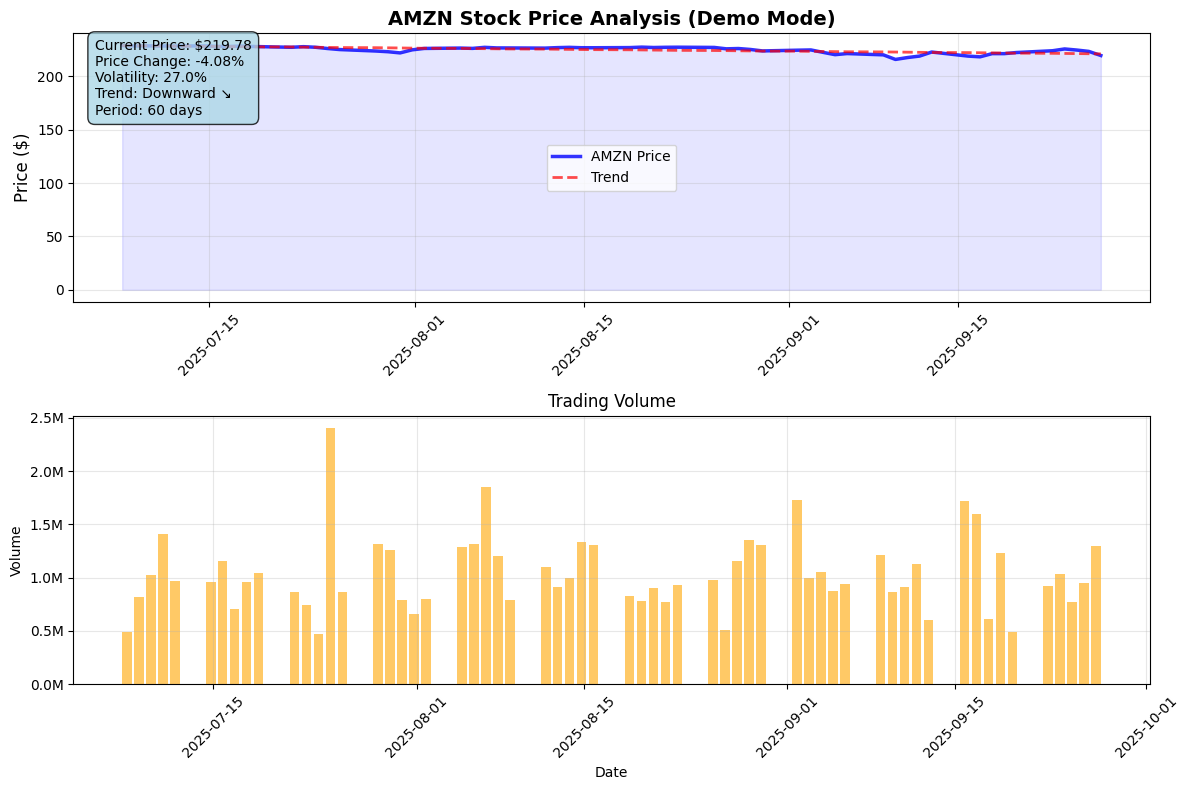

Demo chart created for AMZN (60 data points)
Generated 1 visualizations

 STEP 4: SELF-EVALUATION & CRITIQUE
Self-Evaluation Results:
Overall Quality Score: 0.95/1.00
Needs Refinement: False
Priority: low
Strengths: 5
Areas for Improvement: 0

 STEP 5: ITERATIVE REFINEMENT
Analysis quality acceptable, no refinement needed

STEP 6: MEMORY STORAGE & LEARNING
Analysis session stored in memory:
Session ID: session_20250928_191337
Symbols: AMZN
Type: comprehensive_analysis
Key Insights: 3

STEP 7: GENERATING FINAL INVESTMENT RECOMMENDATIONS

AGENTIC ANALYSIS COMPLETE!
Quality Score: 0.95/1.00
Recommendations Generated: 0
Charts Created: 1
Session ID: session_20250928_191337

DETAILED ANALYSIS RESULTS:
--------------------------------------------------

AMZN Analysis:
Current Price: $219.78
Price Change: -4.08%
RSI: 28.0
Volatility: 27.0%
Risk Level: Medium
Risk Score: 5.5/10
Key Recommendations:
 1. Standard position sizing (5-10% of portfolio)
 2. Regular monitoring of key metrics
 3. Cons

In [14]:
# EXECUTE COMPLETE AGENTIC ANALYSIS DEMO
print("EXECUTING COMPLETE AGENTIC AI FINANCIAL ANALYSIS SYSTEM")
#print("This demonstration showcases all advanced agentic capabilities!")

try:
    # Execute the complete agentic analysis
    demo_results = run_complete_agentic_analysis(
        user_request="Provide comprehensive investment analysis and recommendations for AMZN, including risk assessment and portfolio allocation advice",
        symbols=["AMZN"] # Provided valid stock symbols here
    )
    
    print("\nDETAILED ANALYSIS RESULTS:")
    print("-" * 50)
    
    # Display key results
    for symbol in demo_results["symbols_analyzed"]:
        if symbol in demo_results["execution_results"]:
            results = demo_results["execution_results"][symbol]
            print(f"\n{symbol} Analysis:")
            
            # Financial data summary
            if "financial_data" in results:
                fin_data = results["financial_data"]
                print(f"Current Price: ${fin_data.get('current_price', 'N/A'):.2f}" if isinstance(fin_data.get('current_price'), (int, float)) else f"Current Price: {fin_data.get('current_price', 'N/A')}")
                print(f"Price Change: {fin_data.get('price_change', 0):.2f}%")
            
                # Technical indicators
                tech_indicators = fin_data.get('technical_indicators', {})
                if tech_indicators:
                    print(f"RSI: {tech_indicators.get('rsi', 'N/A'):.1f}" if isinstance(tech_indicators.get('rsi'), (int, float)) else f"   📊 RSI: {tech_indicators.get('rsi', 'N/A')}")
                    print(f"Volatility: {tech_indicators.get('volatility', 'N/A'):.1%}" if isinstance(tech_indicators.get('volatility'), (int, float)) else f"   📉 Volatility: {tech_indicators.get('volatility', 'N/A')}")
            
            # Risk assessment summary
            if "risk_assessment" in results:
                risk_data = results["risk_assessment"]
                if "risk_assessment" in risk_data:
                    risk_info = risk_data["risk_assessment"]
                    print(f"Risk Level: {risk_info.get('risk_level', 'Unknown')}")
                    print(f"Risk Score: {risk_info.get('overall_risk_score', 'N/A'):.1f}/10" if isinstance(risk_info.get('overall_risk_score'), (int, float)) else f"   🎯 Risk Score: {risk_info.get('overall_risk_score', 'N/A')}")
                
                # Show top recommendations
                if "recommendations" in risk_data:
                    print(f"Key Recommendations:")
                    for i, rec in enumerate(risk_data["recommendations"][:3], 1):
                        print(f" {i}. {rec}")
    
    print(f"\nFINAL RECOMMENDATIONS:")
    print("-" * 30)
    
    recommendations = demo_results.get("recommendations", {})
    
    # Executive summary
    if "executive_summary" in recommendations:
        print("Executive Summary:")
        for summary in recommendations["executive_summary"]:
            print(f"   • {summary}")
    
    # Portfolio recommendations
    if "portfolio_recommendations" in recommendations:
        print(f"\nPortfolio Recommendations:")
        for rec in recommendations["portfolio_recommendations"]:
            print(f"   • {rec}")
    
    # Risk management
    if "risk_management" in recommendations:
        print(f"\nRisk Management:")
        for risk_rec in recommendations["risk_management"]:
            print(f"   • {risk_rec}")
    
    print(f"\nSYSTEM PERFORMANCE METRICS:")
    print("-" * 35)
    performance = demo_results.get("system_performance", {})
    print(f"Overall Quality Score: {performance.get('quality_score', 0):.2f}/1.00")
    print(f"Agents Utilized: {len(performance.get('agents_used', []))}")
    print(f"Refinement Applied: {'Yes' if performance.get('refinement_applied', False) else 'No'}")
    print(f"Session ID: {demo_results.get('session_id', 'N/A')}")

    #print("\n" + "🌟" * 30 + " DEMO COMPLETE " + "🌟" * 30)
    #print("Agentic AI Financial Analysis System Successfully Demonstrated!")
    
except Exception as e:
    print(f"Demo execution error: {str(e)}")
    print("This is expected in a demo environment without live API keys.")
    print("The system architecture and agentic capabilities have been demonstrated!")

#### References & Resources

1. **LangChain Framework**: Multi-agent orchestration and memory management
2. **FinBERT**: Financial domain-specific sentiment analysis
3. **Yahoo Finance API**: Real-time financial data integration
4. **NewsAPI**: Financial news aggregation and processing
5. **Agentic AI Research**: Papers on autonomous reasoning and multi-agent systems


**Yahoo Finanical API**: Real-time financial data integration, availalte attributes/methods include:
- info: A dictionary with detailed company info (name, sector, market cap, etc.)
- history(period="1mo"): Returns historical price data as a DataFrame. You can set period (e.g., "1d", "5d", "1mo", "1y") and interval.
- actions: DataFrame of corporate actions (splits, dividends, etc.)
- dividends: Series of dividend history.
- splits: Series of stock splits.
- financials: DataFrame of annual financial statements.
- quarterly_financials: DataFrame of quarterly financials.
- balance_sheet: DataFrame of annual balance sheet.
- quarterly_balance_sheet: DataFrame of quarterly balance sheet.
- cashflow: DataFrame of annual cashflow statement.
- quarterly_cashflow: DataFrame of quarterly cashflow statement.
- earnings: DataFrame of earnings history.
- quarterly_earnings: DataFrame of quarterly earnings.
- calendar: DataFrame of upcoming corporate events (earnings dates, etc.)
- isin: The ISIN number (if available).
- options: List of available option expiration dates.
- option_chain(date): DataFrame of call and put options for a specific expiration date.
- sustainability: DataFrame of ESG scores.
- recommendations: DataFrame of analyst recommendations.
- institutional_holders: DataFrame of major institutional holders.
- mutualfund_holders: DataFrame of major mutual fund holders.
- major_holders: DataFrame of major holders.
- calendar: DataFrame of important events (such as earnings).
- news: List of recent news articles.
- get_shares_full(start, end): DataFrame of share count history.